# Import pakages

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
from datetime import time
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Read the csv files to pandas dataframe

Read the sample test file 

In [2]:
accident_test= pd.read_csv("C:/Users/sachi/Documents/sem2/Project/Dataset/test.csv")
accident_test.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,14,13,2,0,06-10-2013,6,13:28,218,E10000032,4,...,Daylight: Street light present,Snowing without high winds,Dry,None,None,2,Yes,England,HX2 8WH,United Kingdom
1,17,13,2,0,22-04-2013,7,09:30,157,E10000034,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,RM8 1DD,United Kingdom
2,21,13,2,0,27-09-2013,3,19:10,155,E09000012,3,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,England,SE23 1NH,United Kingdom
3,23,13,2,0,13-03-2013,4,09:19,26,E10000016,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,HU10 7QS,United Kingdom
4,28,14,2,0,13-06-2013,1,14:59,6,E08000012,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,BD23 5JL,United Kingdom


#Read the sample Training file

In [3]:
accident_train= pd.read_csv("C:/Users/sachi/Documents/sem2/Project/Dataset/train.csv")
accident_train.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,1,34,2,1,19-12-2012,7,13:20,344,E10000032,4,...,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom
1,2,5,2,1,02-11-2012,4,07:53,102,E09000026,3,...,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom
2,3,1,2,1,02-11-2012,4,16:00,531,E10000016,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom
3,4,1,1,1,06-05-2012,1,16:50,7,E08000035,6,...,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom
4,5,46,1,1,30-06-2012,3,13:25,519,E10000031,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,United Kingdom


# Combine the train and test sample dataframe to form a new dataframe for further analysis on the accident data

In [4]:
train_test= [accident_test, accident_train]

In [5]:
# combined dataframe
accident= pd.concat(train_test)
accident.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,14,13,2,0,06-10-2013,6,13:28,218,E10000032,4,...,Daylight: Street light present,Snowing without high winds,Dry,None,None,2,Yes,England,HX2 8WH,United Kingdom
1,17,13,2,0,22-04-2013,7,09:30,157,E10000034,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,RM8 1DD,United Kingdom
2,21,13,2,0,27-09-2013,3,19:10,155,E09000012,3,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,England,SE23 1NH,United Kingdom
3,23,13,2,0,13-03-2013,4,09:19,26,E10000016,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,HU10 7QS,United Kingdom
4,28,14,2,0,13-06-2013,1,14:59,6,E08000012,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,BD23 5JL,United Kingdom


# Check the dataframe info

In [6]:
accident.columns

Index(['Accident_ID', 'Police_Force', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'state', 'postcode', 'country'],
      dtype='object')

## Rename the columns

In [7]:
accident= accident.rename(columns={'Accident_ID':'accident_id','Police_Force':'police_force','Number_of_Vehicles':'numberofvehicles',
                                  'Number_of_Casualties':'casualties','Day_of_Week':'dayofweek',
                                   'Local_Authority_(District)':'local_auth_dist',
                                  'Local_Authority_(Highway)':'local_auth_highway','1st_Road_Class':'first_rd_cls',
                                  '1st_Road_Number':'first_rd_number','Road_Type':'rd_type',
                                  'Speed_limit':'speed_limit','2nd_Road_Class':'second_rd_cls','2nd_Road_Number':'second_rd_number',
                                  'Pedestrian_Crossing-Human_Control':'pedcross_human',
                                  'Pedestrian_Crossing-Physical_Facilities':'pedcross_physicalfacility',
                                  'Light_Conditions':'light_conditions','Weather_Conditions':'weather_conditions',
                                  'Road_Surface_Conditions':'rd_surface_cond',
                                  'Special_Conditions_at_Site':'spl_cond_at_site','Carriageway_Hazards':'cariageway_hazards',
                                  'Urban_or_Rural_Area':'urban_rural',
                                   'Did_Police_Officer_Attend_Scene_of_Accident':'did_police_attended'})

In [8]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 478740
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   accident_id                600000 non-null  int64 
 1   police_force               600000 non-null  int64 
 2   numberofvehicles           600000 non-null  int64 
 3   casualties                 600000 non-null  int64 
 4   Date                       600000 non-null  object
 5   dayofweek                  600000 non-null  int64 
 6   Time                       599985 non-null  object
 7   local_auth_dist            600000 non-null  int64 
 8   local_auth_highway         600000 non-null  object
 9   first_rd_cls               600000 non-null  int64 
 10  first_rd_number            600000 non-null  int64 
 11  rd_type                    600000 non-null  object
 12  speed_limit                600000 non-null  int64 
 13  second_rd_cls              600000 non-null  

In [9]:
# Check for the dimension of the dataframe
print(accident.shape)

(600000, 27)


In [10]:
# Check for null values in columns
accident.isna().any()

accident_id                  False
police_force                 False
numberofvehicles             False
casualties                   False
Date                         False
dayofweek                    False
Time                          True
local_auth_dist              False
local_auth_highway           False
first_rd_cls                 False
first_rd_number              False
rd_type                      False
speed_limit                  False
second_rd_cls                False
second_rd_number             False
pedcross_human               False
pedcross_physicalfacility    False
light_conditions             False
weather_conditions           False
rd_surface_cond               True
spl_cond_at_site              True
cariageway_hazards           False
urban_rural                  False
did_police_attended          False
state                        False
postcode                     False
country                      False
dtype: bool

In [11]:
# fill all the null values in dataframe with np.nan
accident= accident.fillna(np.nan)

# Check for unique values in columns

In [12]:
accident['accident_id'].unique

<bound method Series.unique of 0             14
1             17
2             21
3             23
4             28
           ...  
478736    599995
478737    599996
478738    599997
478739    599998
478740    599999
Name: accident_id, Length: 600000, dtype: int64>

In [13]:
accident['police_force'].unique()

array([13, 14,  6, 11, 50, 12, 15,  1, 44,  5, 16, 10, 33, 43, 22,  4, 34,
       51, 52, 42, 20, 36, 49, 21, 35,  7, 97, 46, 53,  3, 96,  9, 94, 17,
       60, 47, 23, 41, 45, 32,  8, 62, 54, 95, 93, 31, 92, 61, 64, 98, 63,
       19,  2, 37, 55, 30, 91, 48, 59, 40, 38, 29, 39, 56, 18, 24],
      dtype=int64)

There is no null value in police force column

In [14]:
accident['numberofvehicles'].unique()

array([2, 3, 1, 4], dtype=int64)

There is no null value in number of vehicles column

In [15]:
accident['casualties'].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

There is no null value in number of casualties column

In [16]:
accident['dayofweek'].unique()

array([6, 7, 3, 4, 1, 5, 2], dtype=int64)

There is no null value in day of week

In [17]:
accident['Time'].nunique()

1379

In [18]:
# Date column need to be converted to DateTime data type
accident["Date"]= pd.to_datetime(accident["Date"])
accident["Time"]= pd.to_datetime(accident["Time"])

C:\Users\sachi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-04-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sachi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-09-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sachi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-03-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sachi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-06-2013' in DD/MM/YYYY format. Provide format or specif

In [19]:
accident[accident['Time'].isnull()]

,accident_id,police_force,numberofvehicles,casualties,Date,dayofweek,Time,local_auth_dist,local_auth_highway,first_rd_cls,...,light_conditions,weather_conditions,rd_surface_cond,spl_cond_at_site,cariageway_hazards,urban_rural,did_police_attended,state,postcode,country
83772,414886,1,1,0,2013-05-02,6,NaT,26,E08000032,6,...,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1,Yes,England,OX10 0QX,United Kingdom
51512,64438,42,2,2,2012-07-28,6,NaT,504,E06000049,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,England,ST17 0NY,United Kingdom
61523,76925,51,2,1,2012-06-02,5,NaT,716,E06000003,3,...,Daylight: Street light present,Fine without high winds,Wet/Damp,Roadworks,None,1,Yes,Cymru / Wales,LN11 8UJ,United Kingdom
72250,90446,5,1,1,2012-01-17,6,NaT,94,E06000029,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,LE10 2DN,United Kingdom
151076,189104,21,1,2,2012-04-02,7,NaT,287,E10000028,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,England,WS11 1HE,United Kingdom
152575,190977,61,2,1,2012-03-11,5,NaT,683,E06000038,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,Cymru / Wales,NR10 4DT,United Kingdom
160861,201372,1,2,1,2012-04-09,6,NaT,23,E06000014,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,PR25 3BF,United Kingdom
209845,262812,21,2,2,2012-09-04,7,NaT,362,W06000016,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,HG2 7DD,United Kingdom
223830,280336,21,2,1,2012-11-13,3,NaT,221,E10000029,3,...,Darkness: Street lighting unknown,Fine without high winds,Frost/Ice,None,None,2,Yes,England,RG45 7HF,United Kingdom
314698,394275,95,3,1,2012-03-02,5,NaT,941,E06000017,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,Alba / Scotland,NR11 6PJ,United Kingdom


In [20]:
#accident['Time']=accident['Time'].replace("",np.nan)
#accident['Time']=accident['Time'].astype(str)
accident.drop(accident.index[[83772,51512,61523,72250,151076,152575,160861,209845,223830,314698,323568,328916,
                                        332558,420430,430695]], axis=0, inplace=True)    

In [21]:
accident[accident['Time'].isnull()]

,accident_id,police_force,numberofvehicles,casualties,Date,dayofweek,Time,local_auth_dist,local_auth_highway,first_rd_cls,...,light_conditions,weather_conditions,rd_surface_cond,spl_cond_at_site,cariageway_hazards,urban_rural,did_police_attended,state,postcode,country
151076,189104,21,1,2,2012-04-02,7,NaT,287,E10000028,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,England,WS11 1HE,United Kingdom
152575,190977,61,2,1,2012-03-11,5,NaT,683,E06000038,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,Cymru / Wales,NR10 4DT,United Kingdom
160861,201372,1,2,1,2012-04-09,6,NaT,23,E06000014,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,PR25 3BF,United Kingdom
209845,262812,21,2,2,2012-09-04,7,NaT,362,W06000016,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,HG2 7DD,United Kingdom
223830,280336,21,2,1,2012-11-13,3,NaT,221,E10000029,3,...,Darkness: Street lighting unknown,Fine without high winds,Frost/Ice,None,None,2,Yes,England,RG45 7HF,United Kingdom
314698,394275,95,3,1,2012-03-02,5,NaT,941,E06000017,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,Alba / Scotland,NR11 6PJ,United Kingdom
323568,405453,21,4,1,2012-07-20,3,NaT,137,E06000050,3,...,Daylight: Street light present,Fine without high winds,Frost/Ice,None,None,2,Yes,Alba / Scotland,WA6 8LE,United Kingdom
328916,412114,1,2,1,2012-12-30,4,NaT,12,E06000039,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,TQ4 7DQ,United Kingdom
332558,416732,1,2,2,2012-11-14,2,NaT,11,E06000016,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,WF4 1LR,United Kingdom
420430,526997,52,2,3,2012-08-11,4,NaT,513,E10000023,5,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,England,N18 3QU,United Kingdom


In [22]:
accident['hr']= accident['Time'].dt.hour

In [23]:
accident['local_auth_dist'].unique()

array([218, 157, 155,  26,   6,  98, 161, 755, 150, 137, 145, 199,  23,
       471,  25,  20, 141,  92,  24,   9,  82,  89,  18, 130, 201, 204,
       146, 198, 195, 202, 371, 208,  27,  10,   8,  79,  12,  28, 110,
       500, 465,  95, 206, 488, 269,   1,  99,   7,  94, 203,  22, 147,
       209,  81, 213, 480, 458, 305, 152, 325,  83, 105, 503, 132, 144,
       336, 542, 207, 104, 630, 473, 510, 490, 131, 149, 134,  86,  19,
       135, 513,  85, 139, 142, 481, 528, 153, 192, 102, 106, 459,  90,
       214, 487, 215, 216, 700, 148,  84, 140, 293, 287,   4, 163, 156,
       200, 250, 193, 151, 154, 158, 332, 212, 364, 143,  77,  30, 738,
       918, 477,  96,   3, 530,  21, 302, 532,  13, 509, 539, 445, 196,
       100, 281, 557, 337, 211, 344, 138,  11, 101, 492, 129, 304, 511,
        71, 197,  87, 543, 498, 931, 210, 136, 300, 122, 677, 255, 221,
         5,  97, 507, 236, 120,  91, 549, 501, 579, 628, 496, 276, 571,
       474, 109,  93,  14, 205, 497, 133,  33, 314, 253, 516, 52

In [24]:
accident['local_auth_highway'].unique()

array(['E10000032', 'E10000034', 'E09000012', 'E10000016', 'E08000012',
       'E09000006', 'E06000055', 'E09000007', 'E08000036', 'E06000050',
       'E10000015', 'E06000014', 'E08000009', 'E06000013', 'E08000021',
       'E08000025', 'E08000015', 'E08000020', 'E10000002', 'E09000016',
       'S12000036', 'E10000009', 'E08000035', 'E09000008', 'E10000031',
       'E10000029', 'E09000028', 'E08000017', 'E10000024', 'E06000011',
       'E08000014', 'E09000002', 'E08000010', 'E08000033', 'E08000018',
       'E09000026', 'E09000031', 'E06000009', 'E06000054', 'E06000046',
       'S12000006', 'S12000029', 'E06000024', 'E06000023', 'E08000023',
       'E10000008', 'E10000014', 'E09000003', 'E10000027', 'E08000027',
       'E09000020', 'E10000011', 'E08000001', 'E09000022', 'E08000019',
       'E06000049', 'E06000043', 'W06000023', 'E06000030', 'E10000006',
       'E06000026', 'E09000033', 'E09000015', 'E06000042', 'E09000004',
       'E09000019', 'E06000012', 'E08000031', 'E08000006', 'E080

In [25]:
accident['first_rd_cls'].unique()

array([4, 6, 3, 5, 1], dtype=int64)

In [26]:
accident['first_rd_number'].unique()

array([6358,   29, 5376, ..., 8232, 9216, 6981], dtype=int64)

In [27]:
accident['first_rd_number'].nunique()

5768

In [28]:
accident['rd_type'].unique()

array(['Single carriageway', 'Roundabout', 'Dual carriageway',
       'One way street', 'Unknown', 'Slip road'], dtype=object)

In [29]:
accident['speed_limit'].unique()

array([60, 30, 40, 50, 20, 70], dtype=int64)

In [30]:
accident['second_rd_cls'].unique()

array([ 6, -1,  3,  5,  4], dtype=int64)

In [31]:
accident['second_rd_number'].unique()

array([0], dtype=int64)

All the values in 2nd class road number are zero, which do not make any impact on the output, Hence removing the column.

In [32]:
accident.drop("second_rd_number", axis=1, inplace=True)

In [33]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599976 entries, 0 to 478740
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   accident_id                599976 non-null  int64         
 1   police_force               599976 non-null  int64         
 2   numberofvehicles           599976 non-null  int64         
 3   casualties                 599976 non-null  int64         
 4   Date                       599976 non-null  datetime64[ns]
 5   dayofweek                  599976 non-null  int64         
 6   Time                       599965 non-null  datetime64[ns]
 7   local_auth_dist            599976 non-null  int64         
 8   local_auth_highway         599976 non-null  object        
 9   first_rd_cls               599976 non-null  int64         
 10  first_rd_number            599976 non-null  int64         
 11  rd_type                    599976 non-null  object  

In [34]:
accident['pedcross_human'].unique()

array(['None within 50 metres', 'Control by other authorised person',
       'Control by school crossing patrol'], dtype=object)

In [35]:
accident['pedcross_physicalfacility'].unique()

array(['No physical crossing within 50 meters',
       'non-junction pedestrian crossing',
       'Pedestrian phase at traffic signal junction', 'Zebra crossing',
       'Central refuge', 'Footbridge or subway'], dtype=object)

In [36]:
accident['light_conditions'].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkeness: No street lighting',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit'], dtype=object)

In [37]:
accident['weather_conditions'].unique()

array(['Snowing without high winds', 'Fine without high winds',
       'Raining with high winds', 'Raining without high winds',
       'Fine with high winds', 'Other', 'Fog or mist', 'Unknown',
       'Snowing with high winds'], dtype=object)

In [38]:
accident['weather_conditions']= accident['weather_conditions'].replace('Unknown','Not reported')
accident['weather_conditions'].unique()

array(['Snowing without high winds', 'Fine without high winds',
       'Raining with high winds', 'Raining without high winds',
       'Fine with high winds', 'Other', 'Fog or mist', 'Not reported',
       'Snowing with high winds'], dtype=object)

In [39]:
accident['rd_surface_cond'].unique()

array(['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', nan,
       'Flood (Over 3cm of water)'], dtype=object)

In [40]:
accident['rd_surface_cond']= accident['rd_surface_cond'].replace(np.nan, 'Not reported')
accident['rd_surface_cond'].unique()

array(['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Not reported',
       'Flood (Over 3cm of water)'], dtype=object)

In [41]:
accident['spl_cond_at_site'].unique()

array(['None', 'Roadworks',
       'Permanent sign or marking defective or obscured', 'Ol or diesel',
       'Auto traffic singal out', 'Road surface defective', 'Mud',
       'Auto traffic signal partly defective', nan], dtype=object)

In [42]:
accident['spl_cond_at_site']= accident['spl_cond_at_site'].replace(np.nan, 'Not reported')
accident['spl_cond_at_site']= accident['spl_cond_at_site'].replace('Ol or diesel', 'Oil or diesel')
accident['spl_cond_at_site'].unique()

array(['None', 'Roadworks',
       'Permanent sign or marking defective or obscured', 'Oil or diesel',
       'Auto traffic singal out', 'Road surface defective', 'Mud',
       'Auto traffic signal partly defective', 'Not reported'],
      dtype=object)

In [43]:
accident['cariageway_hazards'].unique()

array(['None', 'Other object in carriageway',
       'Any animal (except a ridden horse)',
       'Involvement with previous accident',
       'Pedestrian in carriageway (not injured)',
       'Dislodged vehicle load in carriageway'], dtype=object)

In [44]:
accident['urban_rural'].unique()

array([2, 1], dtype=int64)

In [45]:
# Replace 1 with "Rural" and 2 with "Urban" based on postcode
accident['urban_rural']= accident['urban_rural'].replace(1,'Rural')
accident['urban_rural']= accident['urban_rural'].replace(2,'Urban')
accident['urban_rural'].unique()

array(['Urban', 'Rural'], dtype=object)

In [46]:
accident['did_police_attended'].unique()

array(['Yes', 'No'], dtype=object)

In [47]:
accident['state'].unique()

array(['England', 'Alba / Scotland', 'Cymru / Wales'], dtype=object)

In [48]:
accident['postcode'].unique()

array(['HX2 8WH', 'RM8 1DD', 'SE23 1NH', ..., 'LE13 0PB', 'CF35 6EE',
       'RM11 1JU'], dtype=object)

In [49]:
accident['postcode'].nunique()

99688

In [50]:
accident['country'].unique()

array(['United Kingdom'], dtype=object)

## Change the data type of some columns having few unique values to category

In [51]:
accident['first_rd_cls']= accident['first_rd_cls'].astype('category')
accident['rd_type']= accident['rd_type'].astype('category')
accident['speed_limit']= accident['speed_limit'].astype('category')
accident['second_rd_cls']= accident['second_rd_cls'].astype('category')

In [52]:
# Replace the unknown with "Not reported" and combine "one way street" and "slip road" as a single category.
accident['rd_type']= accident['rd_type'].replace("Unknown", "Not reported")
accident['rd_type']= accident['rd_type'].replace("One way street", "One way or slip road")
accident['rd_type']= accident['rd_type'].replace("Slip road", "One way or slip road")
accident['rd_type'].unique()

['Single carriageway', 'Roundabout', 'Dual carriageway', 'One way or slip road', 'Not reported']
Categories (5, object): ['Dual carriageway', 'One way or slip road', 'Roundabout', 'Single carriageway', 'Not reported']

In [53]:
#second road class numbers in Uk are from 1 to 9. Hence rename the "-1" in second_rd_cls to "1"
accident['second_rd_cls']= accident['second_rd_cls'].replace("-1", "1")

In [54]:
accident['pedcross_human']= accident['pedcross_human'].astype('category')
accident['pedcross_physicalfacility']= accident['pedcross_physicalfacility'].astype('category')

In [55]:
# In ped_cross_human drop down combine the 'Control by other authorised person' and 'Control by school crossing patrol' 
accident['pedcross_human']= accident['pedcross_human'].replace("Control by other authorised person",
                                                                  "Control by authorized person")
accident['pedcross_human']= accident['pedcross_human'].replace("Control by school crossing patrol",
                                                                  "Control by authorized person")

In [56]:
# pedcross_physicalfacility column categories can be combined to form two options such as No physical crossing within 50 meters
#and Pedestrian crossing Area
accident['pedcross_physicalfacility']= accident['pedcross_physicalfacility'].replace("non-junction pedestrian crossing",
                                                                                     "Pedestrian Crossing Area" )
accident['pedcross_physicalfacility']= accident['pedcross_physicalfacility'].replace("Pedestrian phase at traffic signal junction",
                                                                                     "Pedestrian Crossing Area" )
accident['pedcross_physicalfacility']= accident['pedcross_physicalfacility'].replace("Zebra crossing",
                                                                                     "Pedestrian Crossing Area" )
accident['pedcross_physicalfacility']= accident['pedcross_physicalfacility'].replace("Central refuge",
                                                                                     "Pedestrian Crossing Area" )
accident['pedcross_physicalfacility']= accident['pedcross_physicalfacility'].replace("Footbridge or subway",
                                                                                     "Pedestrian Crossing Area" )

In [57]:
accident['light_conditions']= accident['light_conditions'].astype('category')
accident['weather_conditions']= accident['weather_conditions'].astype('category')

In [58]:
# light conditions can be combined to "Daylight" and "Darkness"
accident['light_conditions']= accident['light_conditions'].replace("Daylight: Street light present", "Daylight")
accident['light_conditions']= accident['light_conditions'].replace("Darkness: Street lights present but unlit", 
                                                                   "Darkeness: No street lighting")

In [59]:
# Combine the values and reduce the number of categories in weather_conditions column
accident['weather_conditions']= accident['weather_conditions'].replace("Snowing without high winds", 
                                                                       "Snowing with/without High Wind")
accident['weather_conditions']= accident['weather_conditions'].replace("Snowing with high winds", 
                                                                       "Snowing with/without High Wind")
accident['weather_conditions']= accident['weather_conditions'].replace("Fine without high winds", "Fine with/without High Wind")
accident['weather_conditions']= accident['weather_conditions'].replace("Fine with high winds", "Fine with/without High Wind")
accident['weather_conditions']= accident['weather_conditions'].replace("Raining with high winds", 
                                                                       "Raining with/without High Wind")
accident['weather_conditions']= accident['weather_conditions'].replace("Raining without high winds", 
                                                                       "Raining with/without High Wind")
accident['weather_conditions']= accident['weather_conditions'].replace("Not reported", "Other")

In [60]:
accident['rd_surface_cond']= accident['rd_surface_cond'].astype('category')
accident['spl_cond_at_site']= accident['spl_cond_at_site'].astype('category')

In [61]:
# Number of categories in rd_surface_cond column can be reduced by combining options
accident['rd_surface_cond']= accident['rd_surface_cond'].replace("Frost/Ice","Snow")

In [62]:
# Reduce the number of categories in spl_cond_at_site column by combining some of the similar values
accident['spl_cond_at_site']= accident['spl_cond_at_site'].replace("Auto traffic singal out","Auto Traffic")
accident['spl_cond_at_site']= accident['spl_cond_at_site'].replace("Auto traffic signal partly defective","Auto Traffic")

In [63]:
accident['cariageway_hazards']= accident['cariageway_hazards'].astype('category')
accident['urban_rural']= accident['urban_rural'].astype('category')
accident['did_police_attended']= accident['did_police_attended'].astype('category')

In [64]:
# Number of categories in "cariageway_hazards" can be reduced by combining similar values
accident['cariageway_hazards']= accident['cariageway_hazards'].replace("Other object in carriageway",
                                                                       "Pedestrian/Other Object")
accident['cariageway_hazards']= accident['cariageway_hazards'].replace("Pedestrian in carriageway (not injured)",
                                                                       "Pedestrian/Other Object")

In [65]:
accident['state']= accident['state'].astype('category')

## Change the datatype of some columns to object

In [66]:
accident["accident_id"]= accident["accident_id"].astype(str)
accident["local_auth_dist"]= accident["local_auth_dist"].astype(str)
accident["local_auth_highway"]= accident["local_auth_highway"].astype(str)
accident["first_rd_number"]=accident["first_rd_number"].astype(str)

In [67]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599976 entries, 0 to 478740
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   accident_id                599976 non-null  object        
 1   police_force               599976 non-null  int64         
 2   numberofvehicles           599976 non-null  int64         
 3   casualties                 599976 non-null  int64         
 4   Date                       599976 non-null  datetime64[ns]
 5   dayofweek                  599976 non-null  int64         
 6   Time                       599965 non-null  datetime64[ns]
 7   local_auth_dist            599976 non-null  object        
 8   local_auth_highway         599976 non-null  object        
 9   first_rd_cls               599976 non-null  category      
 10  first_rd_number            599976 non-null  object        
 11  rd_type                    599976 non-null  category

## Day of week column is converted to Monday to Sunday so that easily identify the day

In [68]:
# Need to assign correct value for Day_of_Week based on the Date value
accident["dayofweek"]= accident["Date"].dt.dayofweek

days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

accident["dayofweek"]= accident["dayofweek"].apply(lambda x:days[x])

In [69]:
accident.head()

,accident_id,police_force,numberofvehicles,casualties,Date,dayofweek,Time,local_auth_dist,local_auth_highway,first_rd_cls,...,weather_conditions,rd_surface_cond,spl_cond_at_site,cariageway_hazards,urban_rural,did_police_attended,state,postcode,country,hr
0,14,13,2,0,2013-06-10,Mon,2023-06-11 13:28:00,218,E10000032,4,...,Snowing with/without High Wind,Dry,None,None,Urban,Yes,England,HX2 8WH,United Kingdom,13.0
1,17,13,2,0,2013-04-22,Mon,2023-06-11 09:30:00,157,E10000034,6,...,Fine with/without High Wind,Dry,None,None,Rural,No,England,RM8 1DD,United Kingdom,9.0
2,21,13,2,0,2013-09-27,Fri,2023-06-11 19:10:00,155,E09000012,3,...,Fine with/without High Wind,Wet/Damp,None,None,Rural,Yes,England,SE23 1NH,United Kingdom,19.0
3,23,13,2,0,2013-03-13,Wed,2023-06-11 09:19:00,26,E10000016,4,...,Fine with/without High Wind,Dry,None,None,Rural,Yes,England,HU10 7QS,United Kingdom,9.0
4,28,14,2,0,2013-06-13,Thu,2023-06-11 14:59:00,6,E08000012,4,...,Fine with/without High Wind,Dry,None,None,Rural,Yes,England,BD23 5JL,United Kingdom,14.0


In [70]:
accident["dayofweek"].dtypes

dtype('O')

In [71]:
# Change the data type of "Day_of_week" column to category
accident["dayofweek"]= accident["dayofweek"].astype('category')

## New columns "month" and "season" for categorizing date

In [72]:
# Already imported datetime package
accident['month']= pd.DatetimeIndex(accident['Date']).month
accident.head()

,accident_id,police_force,numberofvehicles,casualties,Date,dayofweek,Time,local_auth_dist,local_auth_highway,first_rd_cls,...,rd_surface_cond,spl_cond_at_site,cariageway_hazards,urban_rural,did_police_attended,state,postcode,country,hr,month
0,14,13,2,0,2013-06-10,Mon,2023-06-11 13:28:00,218,E10000032,4,...,Dry,None,None,Urban,Yes,England,HX2 8WH,United Kingdom,13.0,6
1,17,13,2,0,2013-04-22,Mon,2023-06-11 09:30:00,157,E10000034,6,...,Dry,None,None,Rural,No,England,RM8 1DD,United Kingdom,9.0,4
2,21,13,2,0,2013-09-27,Fri,2023-06-11 19:10:00,155,E09000012,3,...,Wet/Damp,None,None,Rural,Yes,England,SE23 1NH,United Kingdom,19.0,9
3,23,13,2,0,2013-03-13,Wed,2023-06-11 09:19:00,26,E10000016,4,...,Dry,None,None,Rural,Yes,England,HU10 7QS,United Kingdom,9.0,3
4,28,14,2,0,2013-06-13,Thu,2023-06-11 14:59:00,6,E08000012,4,...,Dry,None,None,Rural,Yes,England,BD23 5JL,United Kingdom,14.0,6


In [73]:
# Converting month number to month name
import calendar

In [74]:
accident['month']= accident['month'].apply(lambda x: calendar.month_abbr[x])
accident['month']

0         Jun
1         Apr
2         Sep
3         Mar
4         Jun
         ... 
478736    Sep
478737    Jan
478738    May
478739    Sep
478740    Dec
Name: month, Length: 599976, dtype: object

In [75]:
# create season column based on month 

In [76]:
season = {'Jan': 'Winter',
          'Feb': 'Winter',
          'Mar': 'Spring', 
          'Apr': 'Spring',
          'May': 'Spring',
          'Jun': 'Summer',
          'Jul': 'Summer',
          'Aug': 'Summer',
          'Sep': 'Autumn',
          'Oct': 'Autumn',
          'Nov': 'Autumn',
          'Dec': 'Winter'}
accident['season']= accident['month'].apply(lambda y: season[y])

In [77]:
accident['season'].unique()

array(['Summer', 'Spring', 'Autumn', 'Winter'], dtype=object)

In [78]:
accident['season']= accident['season'].astype('category')

## To split the day based on the time interval

In [79]:

#accident['Time']= accident['Time'].astype(str)
#hrs= list(map(lambda st: st.split(":",1) [0], accident.Time))

In [80]:
# A function to categorize the time interval
def day_partition(x):
    if (x>=6) & (x<11):
        day_cls='Morning'
    elif (x>=11) & (x<15):
        day_cls='Afternoon'
    elif (x>=15) & (x<21):
        day_cls='Evening'
    else:
        day_cls='Night'
    return day_cls

In [81]:
#hours= pd.DataFrame(hrs)

In [82]:
#hours= hours.apply(pd.to_numeric)

In [83]:
accident['day_cls']= accident['hr'].apply(day_partition)
accident.head()

,accident_id,police_force,numberofvehicles,casualties,Date,dayofweek,Time,local_auth_dist,local_auth_highway,first_rd_cls,...,cariageway_hazards,urban_rural,did_police_attended,state,postcode,country,hr,month,season,day_cls
0,14,13,2,0,2013-06-10,Mon,2023-06-11 13:28:00,218,E10000032,4,...,None,Urban,Yes,England,HX2 8WH,United Kingdom,13.0,Jun,Summer,Afternoon
1,17,13,2,0,2013-04-22,Mon,2023-06-11 09:30:00,157,E10000034,6,...,None,Rural,No,England,RM8 1DD,United Kingdom,9.0,Apr,Spring,Morning
2,21,13,2,0,2013-09-27,Fri,2023-06-11 19:10:00,155,E09000012,3,...,None,Rural,Yes,England,SE23 1NH,United Kingdom,19.0,Sep,Autumn,Evening
3,23,13,2,0,2013-03-13,Wed,2023-06-11 09:19:00,26,E10000016,4,...,None,Rural,Yes,England,HU10 7QS,United Kingdom,9.0,Mar,Spring,Morning
4,28,14,2,0,2013-06-13,Thu,2023-06-11 14:59:00,6,E08000012,4,...,None,Rural,Yes,England,BD23 5JL,United Kingdom,14.0,Jun,Summer,Afternoon


# Data visualization

## Need to sort the data by Date in assending order for exploratory analysis

In [84]:
accident_sorted= accident.sort_values('Date')

In [85]:
accident_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599976 entries, 308242 to 90935
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   accident_id                599976 non-null  object        
 1   police_force               599976 non-null  int64         
 2   numberofvehicles           599976 non-null  int64         
 3   casualties                 599976 non-null  int64         
 4   Date                       599976 non-null  datetime64[ns]
 5   dayofweek                  599976 non-null  category      
 6   Time                       599965 non-null  datetime64[ns]
 7   local_auth_dist            599976 non-null  object        
 8   local_auth_highway         599976 non-null  object        
 9   first_rd_cls               599976 non-null  category      
 10  first_rd_number            599976 non-null  object        
 11  rd_type                    599976 non-null  cate

# Univariate plots

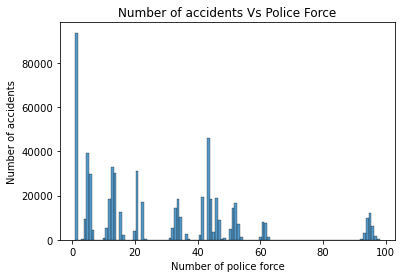

In [86]:
ax=sns.histplot(accident_sorted['police_force'])
ax.set(xlabel='Number of police force', ylabel='Number of accidents', title='Number of accidents Vs Police Force')
plt.show()

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


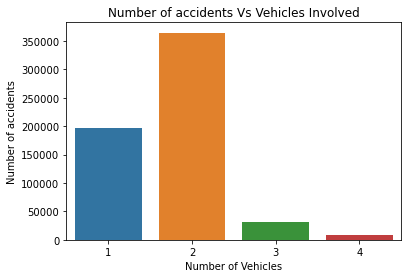

In [87]:
ax=sns.countplot(accident_sorted['numberofvehicles'])
ax.set(xlabel='Number of Vehicles', ylabel='Number of accidents', title='Number of accidents Vs Vehicles Involved')
plt.show()

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


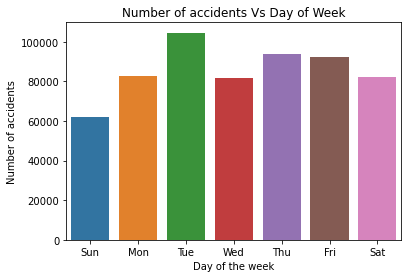

In [88]:
# Count plot for categorical variables 
ax= sns.countplot(accident_sorted['dayofweek'],order=["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])
ax.set(xlabel='Day of the week', ylabel='Number of accidents', title='Number of accidents Vs Day of Week')
plt.show()

Look like counts of accidents are normally distributed across the "Days of week".
Sunday is having lesser number of accidents and Tuesday is having the highest number of accidents.
There is not much variation in other days of week.

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


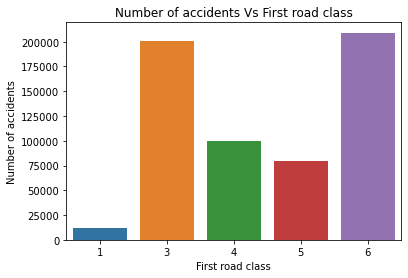

In [89]:
ax=sns.countplot(accident_sorted['first_rd_cls'])
ax.set(xlabel='First road class', ylabel='Number of accidents', title='Number of accidents Vs First road class')
plt.show()

First road class number "3" and "6" have highest number of accidents whereas class "1" has the lowest number of accidents.

Class "4" and "5" have moderate number of accidents with a slight difference in numbers



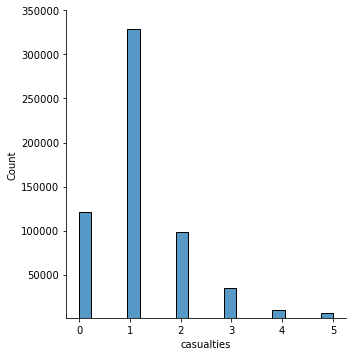

In [90]:
sns.displot(accident_sorted['casualties'])
plt.ylim(1000,350000)
plt.show()

The number of casualties are not normally distributed. 

Majority of the accidents have 1 casualty, moderate number with no casualties or 2 casualties
and lowest with 3 and above number of casualties

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


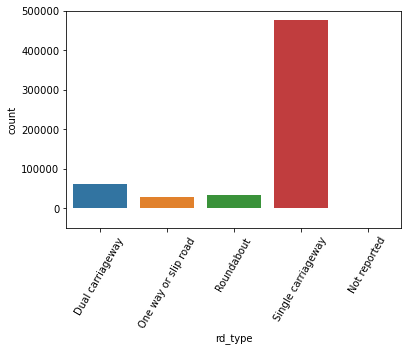

In [91]:
sns.countplot(accident_sorted['rd_type'])
plt.xticks(rotation=60)
plt.ylim(-50000,500000)
plt.show()

Not a normal distribution.
"Single carriageway" is having highest number of accidents.
"Oneway or Slip road" and "Roundabout" type are having lowest number of accidents.
There is a huge difference in numbers between highest to all other lowest values

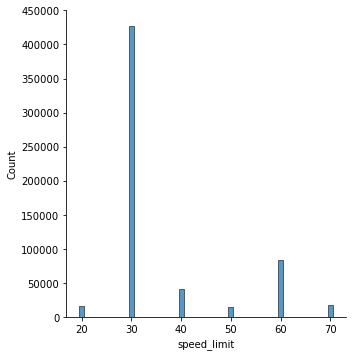

In [92]:
sns.displot(accident_sorted['speed_limit'])
plt.ylim(0,450000)
plt.show()

Highest number of the accidents reported at a zone with speed limit of "30 miles/hr"
All other speed limit zone have lesser number of accidents.
significant difference observed between highest and lowest

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


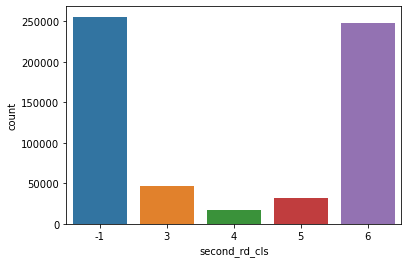

In [93]:
sns.countplot(accident_sorted['second_rd_cls'])
plt.show()

Second road class of "-1" and "6" have highest values of accidents and class of "3","4" and "5" have lowest accident numbers.
The distribution is not normal and there is a significant difference in the highest values and lowest values.

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


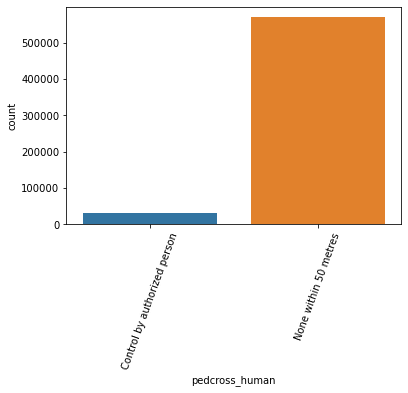

In [94]:
sns.countplot(accident_sorted['pedcross_human'])
plt.xticks(rotation=70)
plt.show()

Highest number of accidents happended in pedestrian cross where no person to control the traffic with a 50 metere distance. This number is huge.
The lowest number of accidents happened in a human controlled school crossing and a authorized person controlled pedestrian area. This number is very low compared to the highest value. 

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


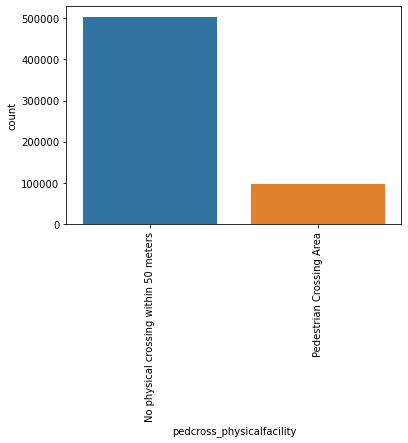

In [95]:
sns.countplot(accident_sorted['pedcross_physicalfacility'])
plt.xticks(rotation=90)
plt.show()

Highest number of accidents reported in the pedstrian cross with no physical crossing within 50 meters. There is significant difference between the highest value and lowest values.

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


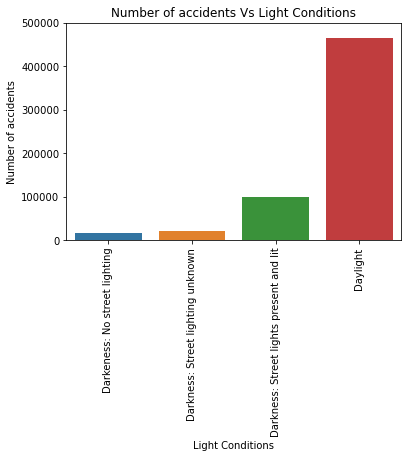

In [96]:
ax=sns.countplot(accident_sorted['light_conditions'])
plt.xticks(rotation=90)
plt.ylim(0,500000)
ax.set(xlabel='Light Conditions', ylabel='Number of accidents', title='Number of accidents Vs Light Conditions')
plt.show()

Highest number of accidents happened at "Daylight" conditions. The lowest number of accidents happened during "Darkness". 
There is significant difference observed in number of accidents when street light present and not present.

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


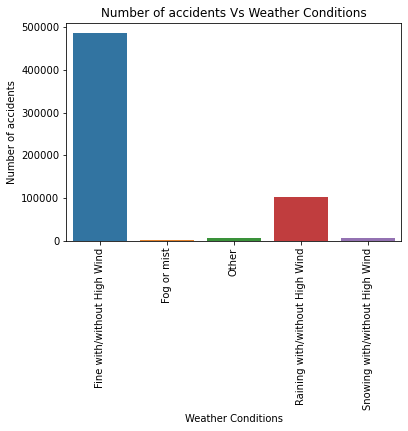

In [97]:
ax=sns.countplot(accident_sorted['weather_conditions'])
plt.xticks(rotation=90)
ax.set(xlabel='Weather Conditions', ylabel='Number of accidents', title='Number of accidents Vs Weather Conditions')
plt.show()

Highest number of accidents happended during the fine weather condition with or without high winds. The number is huge compared to other conditions causing lowest number of accidents.

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


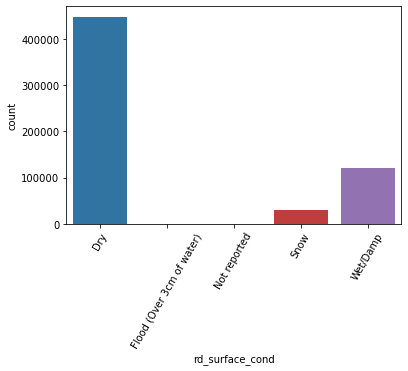

In [98]:
sns.countplot(accident_sorted['rd_surface_cond'])
plt.xticks(rotation=60)
plt.show()

Highest number is observed during "Dry" road conditions and lowest values during "Snow" conditions.
The distribution is not normal and there is significant differnce between highest and lowest values.

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


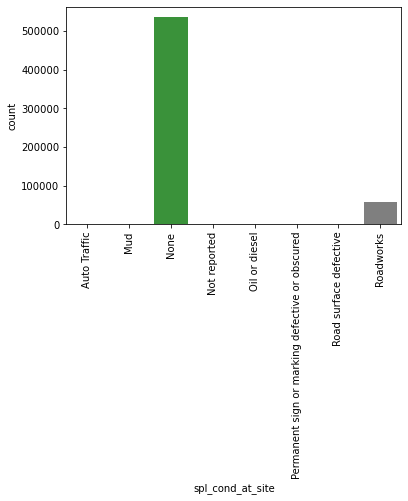

In [99]:
sns.countplot(accident_sorted['spl_cond_at_site'])
plt.xticks(rotation=90)
plt.show()

Highest number of accidents happened at a site where there was no special conditions.
There are some moderate number of accidents reported during road works.
The distribution is not normal.

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


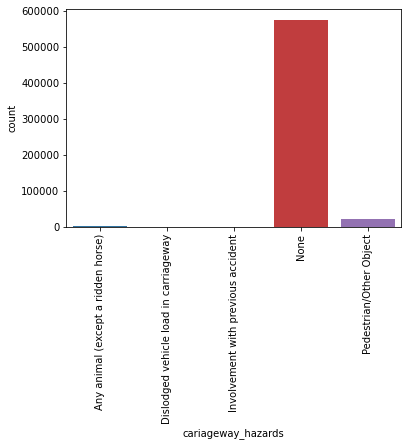

In [100]:
sns.countplot(accident_sorted['cariageway_hazards'])
plt.xticks(rotation=90)
plt.show()

Highest number of accidents happend when there is no carriageway hazards.
The distribution is not normal.

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


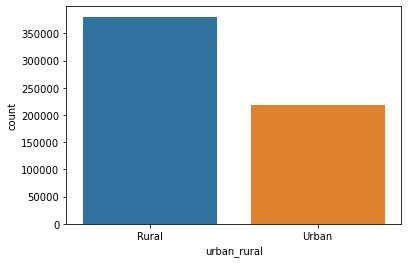

In [101]:
sns.countplot(accident['urban_rural'])
plt.show()

The number of accidents in "Rural" is almost double than the accidents happened in "Urban" areas.

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


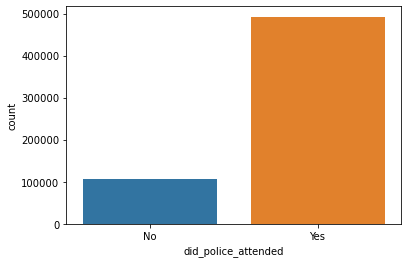

In [102]:
sns.countplot(accident_sorted['did_police_attended'])
plt.show()

The number of accident cases attended by police is 5 times higher than unattended cases. 

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


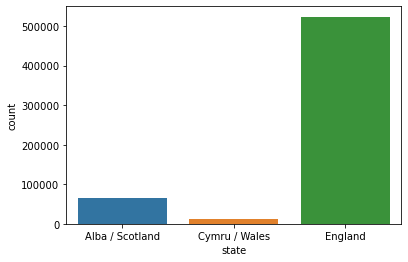

In [103]:
sns.countplot(accident_sorted['state'])
plt.show()

The highest number is reported in England and lowest in Wales.

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


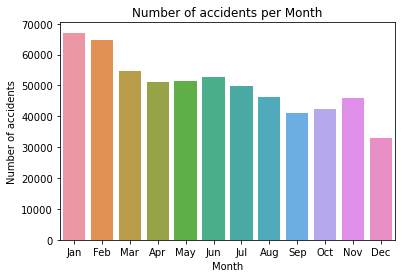

In [104]:
ax=sns.countplot(accident_sorted['month'])
ax.set(xlabel='Month', ylabel='Number of accidents', title='Number of accidents per Month')
plt.show()

Month wise number of accidents are not normally distributed.
The highest numbers are reported in "January" and "February" months and lowest in December.

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '129092'),
 Text(0, 0, '157384'),
 Text(0, 0, '148825'),
 Text(0, 0, '164675')]

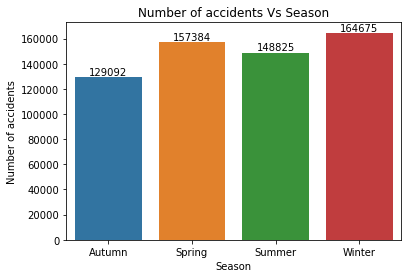

In [105]:
ax=sns.countplot(accident_sorted['season'])
ax.set(xlabel='Season', ylabel='Number of accidents', title='Number of accidents Vs Season')
ax.bar_label(ax.containers[0], label_type='edge')

There is not much difference in highest and lowest number of accidents for different season.
"Winter" and "Spring" have the highest number of accidents, "Summer" with slighly lesser number and "Autumn" with lowest number but not very low compared to other seasons

## Bivariate plots

### Day of week Vs Casualties

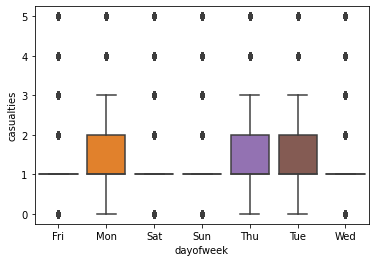

In [106]:
sns.boxplot(data= accident_sorted, x="dayofweek", y="casualties")
plt.show()

There is not much variation in the median value of total casualties.

Highest median value of total casualties is observed for "Tuesday".
The maximum number of total casulties are observed in "Tuesday" and "Friday".
There are ouliers in "Sat" and "Thu" data

### First road class Vs Casualties

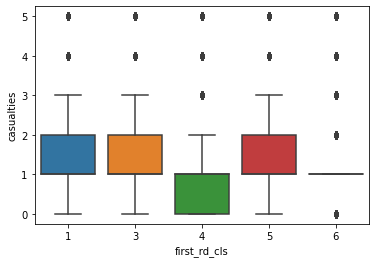

In [107]:
sns.boxplot(data= accident_sorted, x="first_rd_cls", y="casualties")
plt.show()

There are outlies in all the class of data. The highest value is observed for the class "1" and lowest number for class "4" and "6".


### Road type Vs Casualties

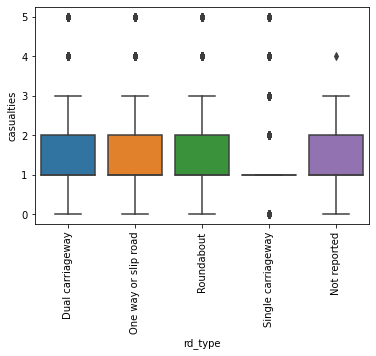

In [108]:
sns.boxplot(data= accident_sorted, x="rd_type", y="casualties")
plt.xticks(rotation=90)
plt.show()

Dual carriage way with highest value and median of total casulties.
All other road type have almost same median lies between 2000 and 3000

### speed_limit vs Casualties

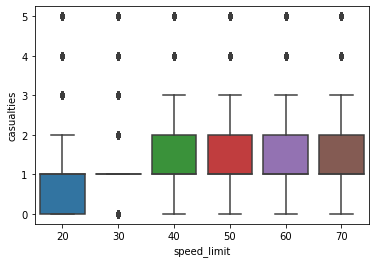

In [109]:
sns.boxplot(data=accident_sorted, x="speed_limit", y="casualties")
plt.show()

There are outliers in the data expect "20 miles/hr" limit.
Median lies between 3000 to 4000

### second_rd_cls vs Casualties

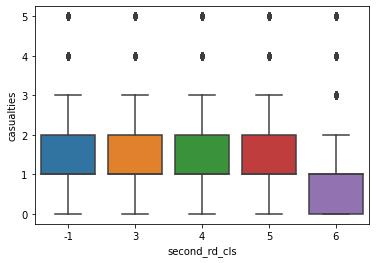

In [110]:
sns.boxplot(data=accident_sorted, x="second_rd_cls", y="casualties")
plt.show()

There are outliers. 

### pedcross_human vs Casulties

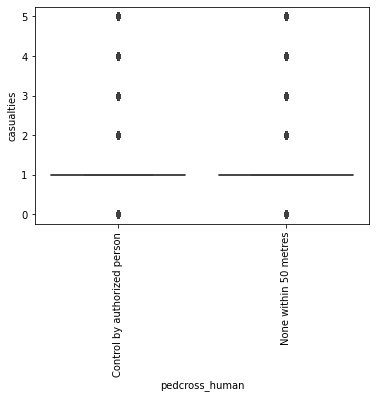

In [111]:
sns.boxplot(data=accident_sorted, x="pedcross_human", y="casualties")
plt.xticks(rotation=90)
plt.show()

There are outliers.
Standard deviation is almost same for all category

### pedcross_physicalfacility Vs Casualties

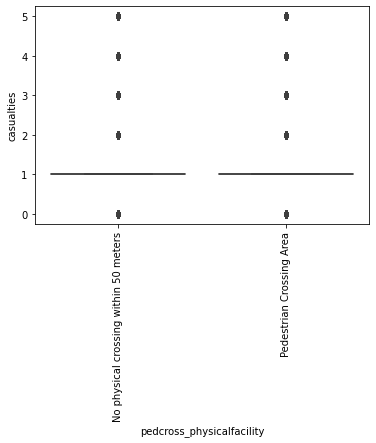

In [112]:
sns.boxplot(data= accident_sorted, x="pedcross_physicalfacility", y="casualties")
plt.xticks(rotation=90)
plt.show()

"Foot bridge or subway" has lowest median of total casualties

### light_conditions Vs Casualties

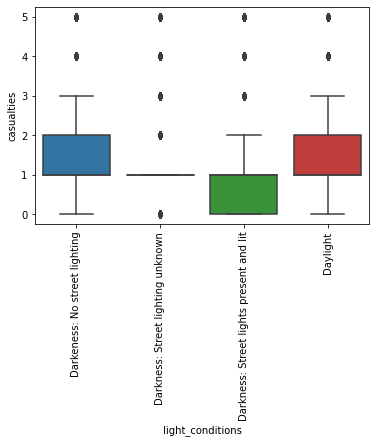

In [113]:
sns.boxplot(data=accident_sorted, x="light_conditions", y="casualties")
plt.xticks(rotation=90)
plt.show()

There are outliers.

### weather_conditions Vs Casualties

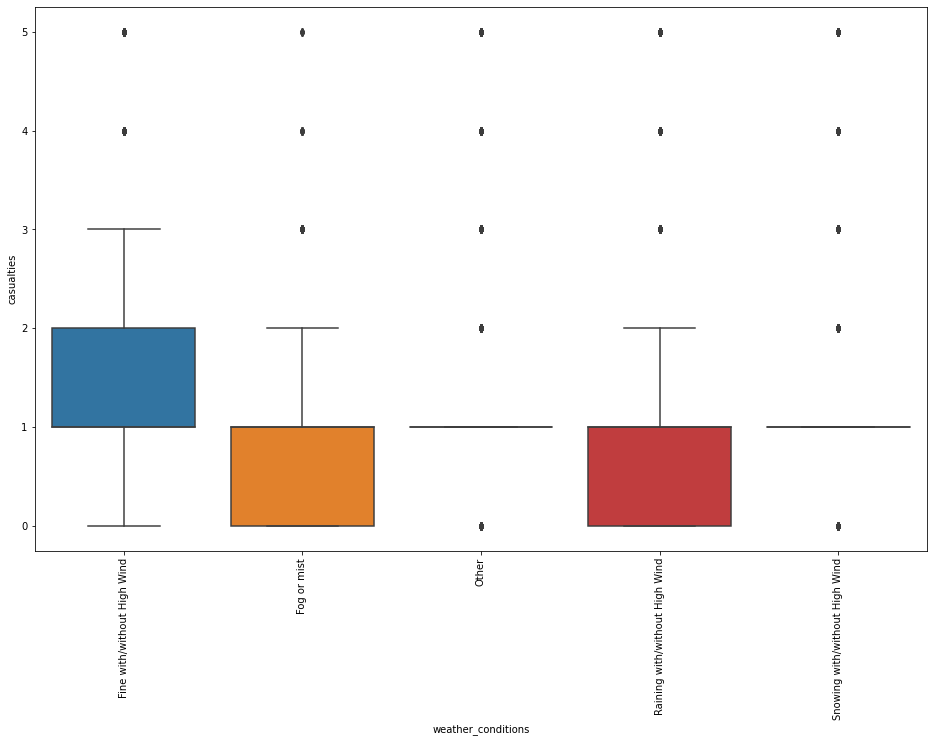

In [114]:
plt.figure(figsize=(16,10))
sns.boxplot(data=accident_sorted, x="weather_conditions", y="casualties")
plt.xticks(rotation=90)
plt.show()

### rd_surface_cond vs Casualties

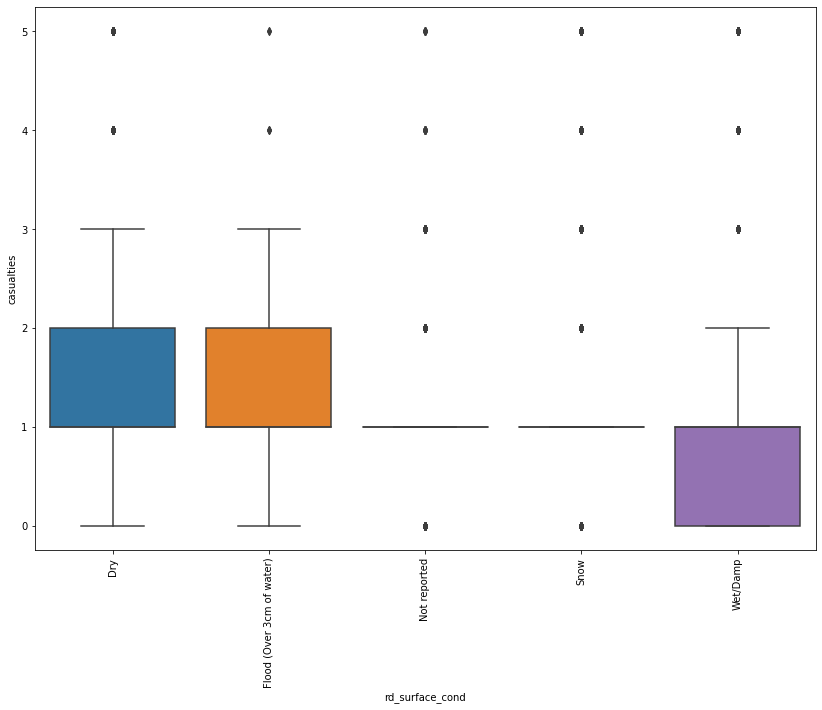

In [115]:
plt.figure(figsize=(14,10))
sns.boxplot(data=accident_sorted, x="rd_surface_cond", y="casualties")
plt.xticks(rotation=90)
plt.show()

Not much variation in the median.
The standard deviation is high for "Flood" condition

### urban_rural Vs Casualties

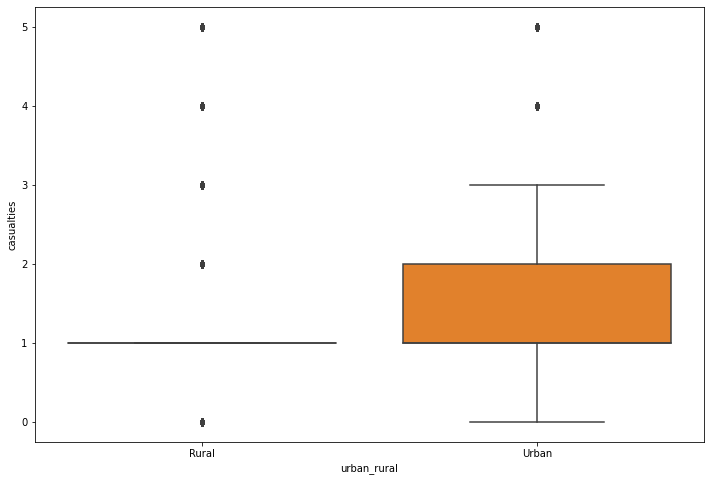

In [116]:
plt.figure(figsize=(12,8))
sns.boxplot(data=accident_sorted, x="urban_rural", y="casualties")
plt.show()

### Month Vs Casualties

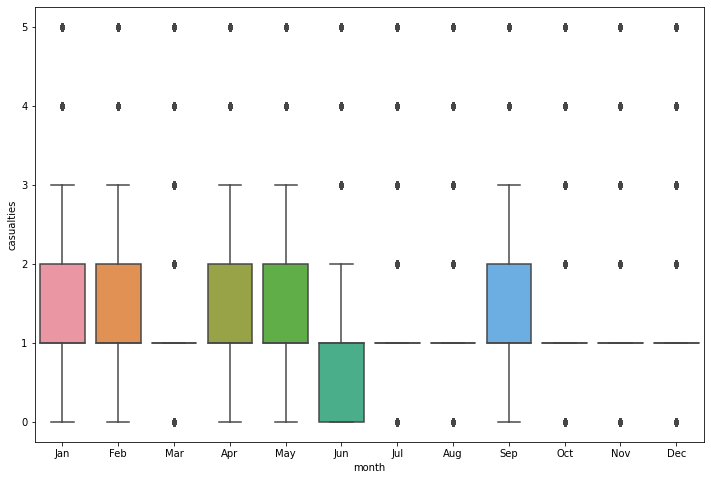

In [117]:
plt.figure(figsize=(12,8))
sns.boxplot(data=accident_sorted, x="month", y="casualties")
plt.show()

Highest median of total casualties in "Jan" and "Feb" month. 
The variation is high for both the months.

### season Vs Casualties

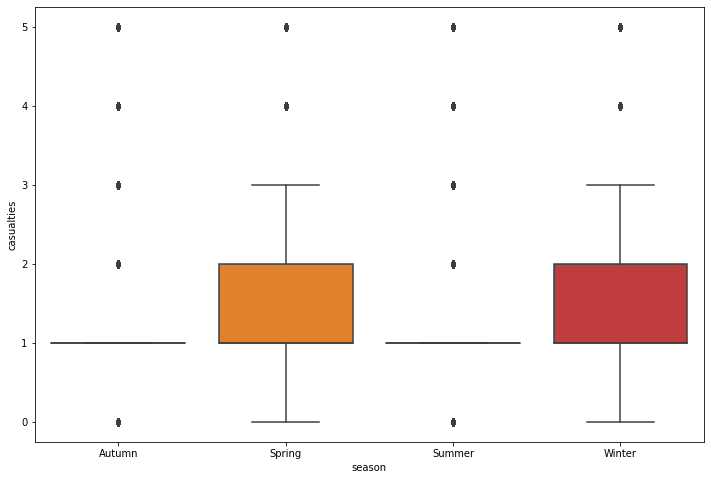

In [118]:
plt.figure(figsize=(12,8))
sns.boxplot(data=accident_sorted, x="season", y="casualties")
plt.show()

"Winter" season has highest median and maximum value of total casualties.
The spread is similar across Autumn, Spring and Summer seasons.

### Multivariate Plots

In [119]:
#sns.pairplot(accident_sorted, hue="urban_rural", palette="Set2", diag_kind="kde", height=2.5)
#plt.show()

In [120]:
day_ordered= ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]

### Casualties Vs DayofWeek Vs First Road Class

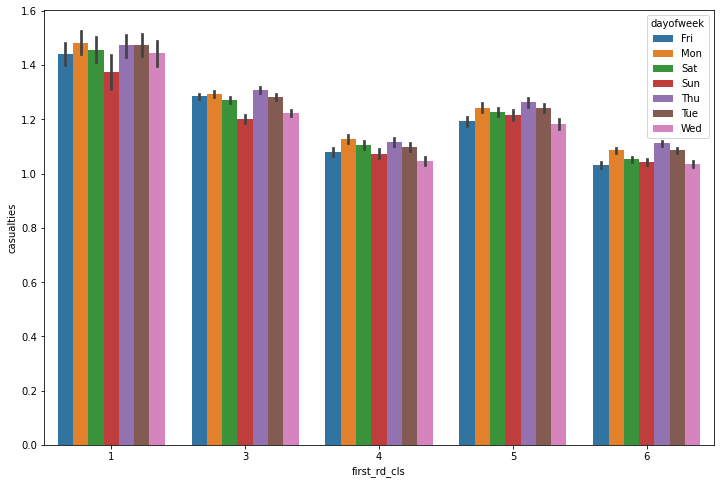

In [121]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="dayofweek")
plt.show()

Highest average of casualties per accident is observed in first_rd_cls number "1" for all the days of week.

The lowest numbers of average casualties per accident are observed in first_rd_cls "4" and "6"

### Casualties Vs Day of Week Vs Road type

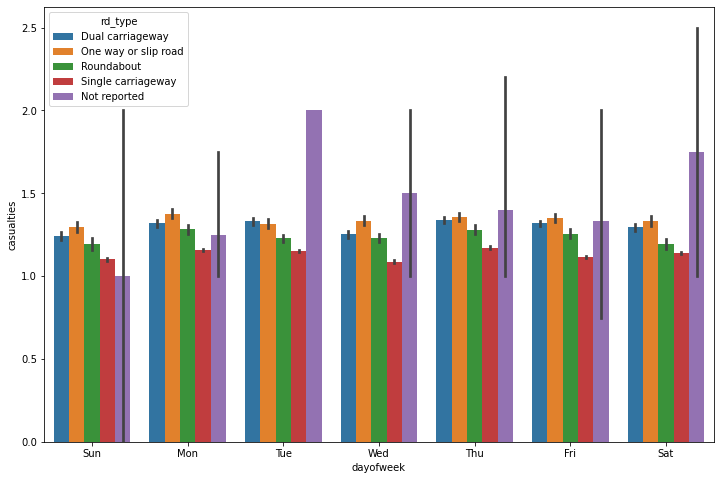

In [122]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="rd_type", 
            order=day_ordered)
plt.show()

Highest average of casualties per accident is reported in one way or slip road in all the days of week except "Tuesday"

### Casualties Vs Day of Week Vs speed_limit

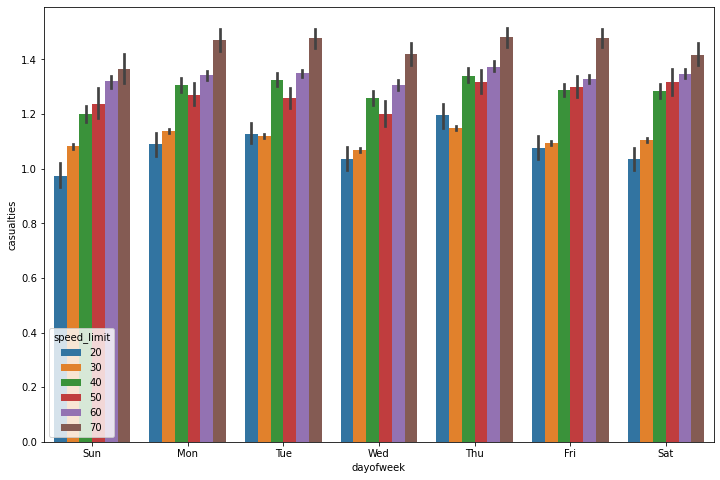

In [123]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="speed_limit", 
            order=day_ordered)
plt.show()

### Casualties Vs Day of Week Vs second_rd_cls

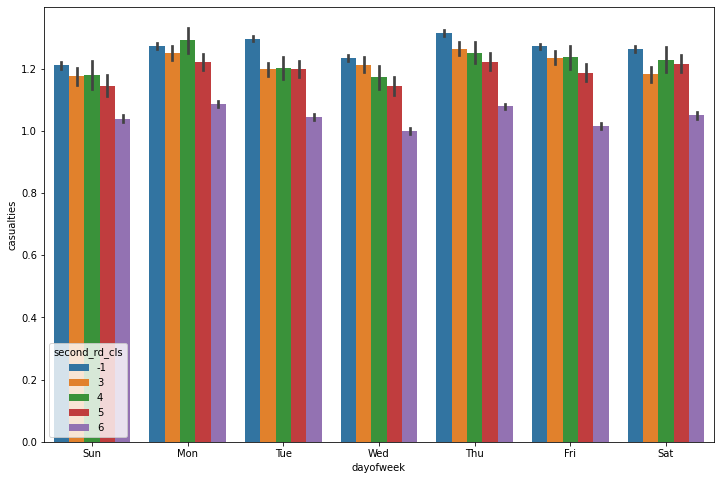

In [124]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="second_rd_cls", 
            order=day_ordered)
plt.show()

### Casualties Vs Day of Week Vs pedcross_human

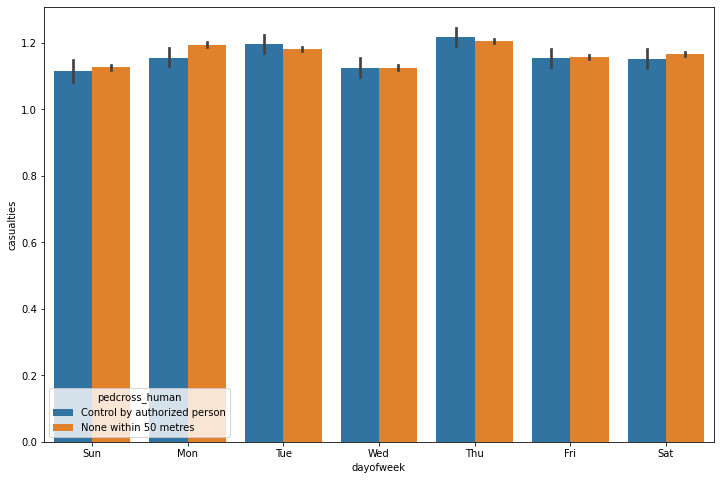

In [125]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="pedcross_human", 
            order=day_ordered)
plt.show()

### Casualties Vs Day of Week Vs pedcross_physicalfacility

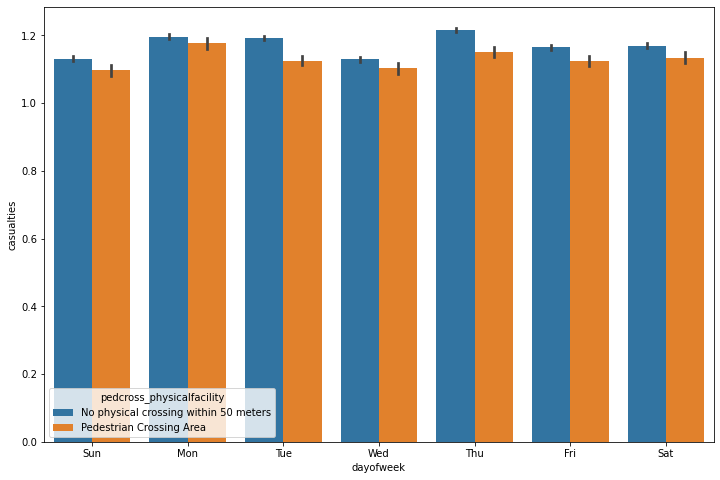

In [126]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="pedcross_physicalfacility", 
            order=["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])
plt.show()

### Casualties Vs Day of Week Vs light_conditions

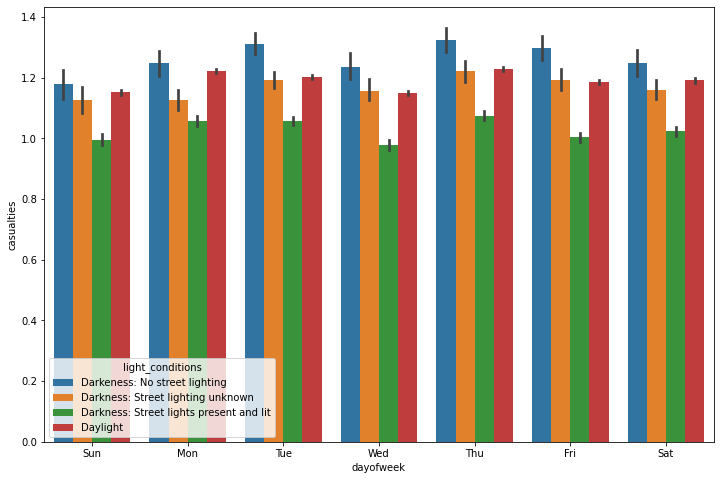

In [127]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="light_conditions", 
            order=day_ordered)
plt.show()

More number of average casualities per accident is observed during day light conditions for all the days of week.

### Casualties Vs Day of Week Vs weather_conditions

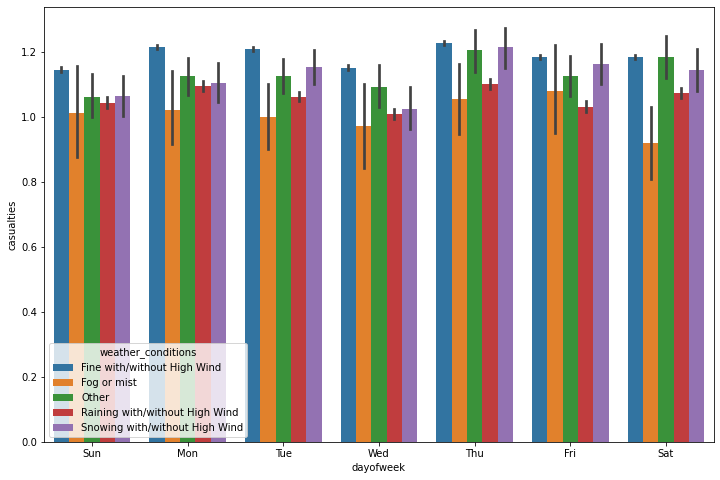

In [128]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="weather_conditions", 
            order=day_ordered)
plt.show()

### Casualties Vs Day_cls Vs Weather Conditions

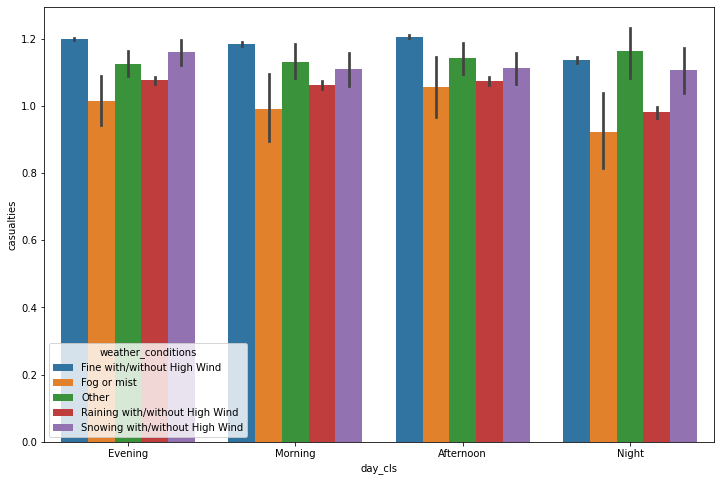

In [129]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="day_cls", y="casualties", hue="weather_conditions")
plt.show()

### casualties Vs Day of Week Vs rd_surface_cond

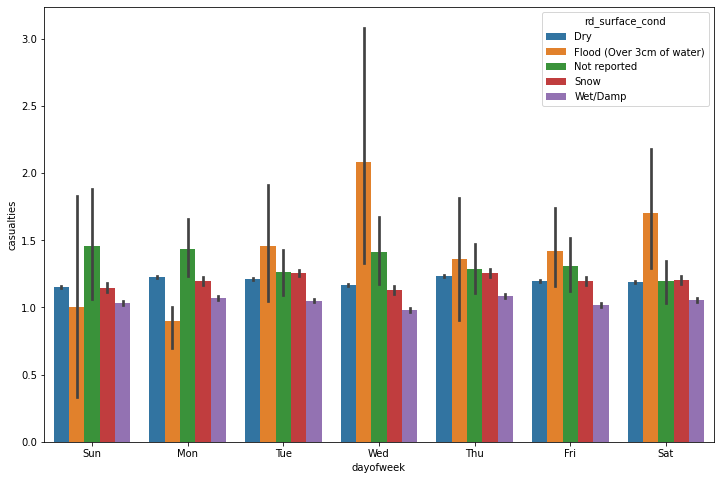

In [130]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="rd_surface_cond", 
            order=day_ordered)
plt.show()

### casualties Vs Day of Week Vs spl_cond_at_site

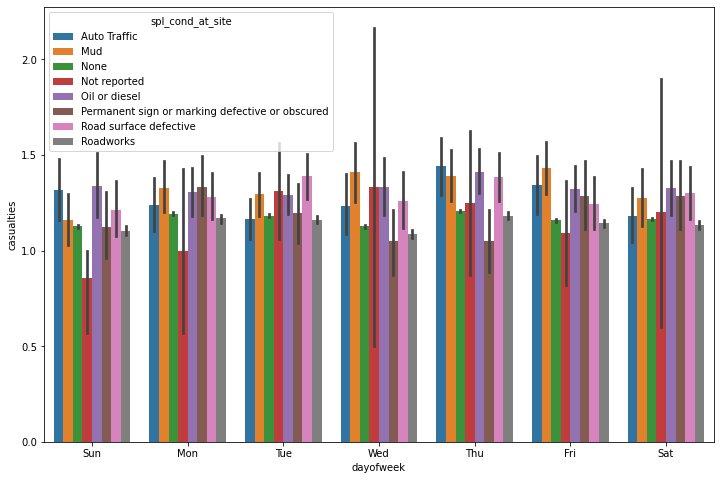

In [131]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="spl_cond_at_site", 
            order=day_ordered)
plt.show()

### casualties Vs Day of Week Vs cariageway_hazards

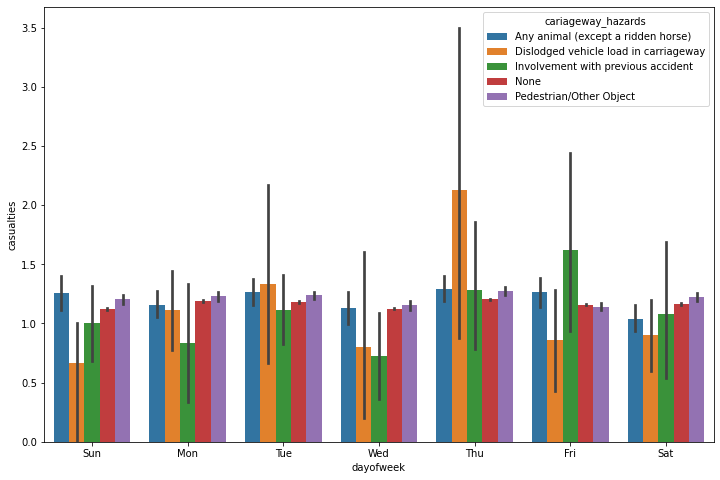

In [132]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="cariageway_hazards", 
            order=day_ordered)
plt.show()

### casualties Vs Day of Week Vs urban_rural

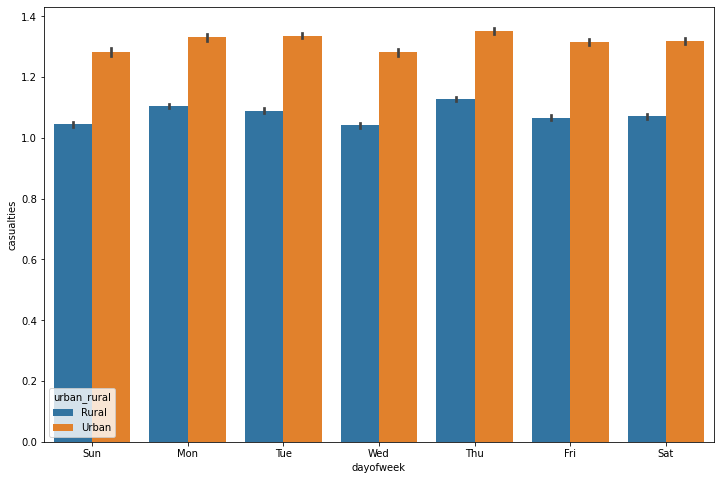

In [133]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="urban_rural", 
            order=day_ordered)
plt.show()

The highest number of average casualties per accident is reported in "Urban" areas in all the days of week. 

There is significant difference in average casualties between "Urban" and "Rural" areas.

### casualties Vs Day of Week Vs did_police_attended

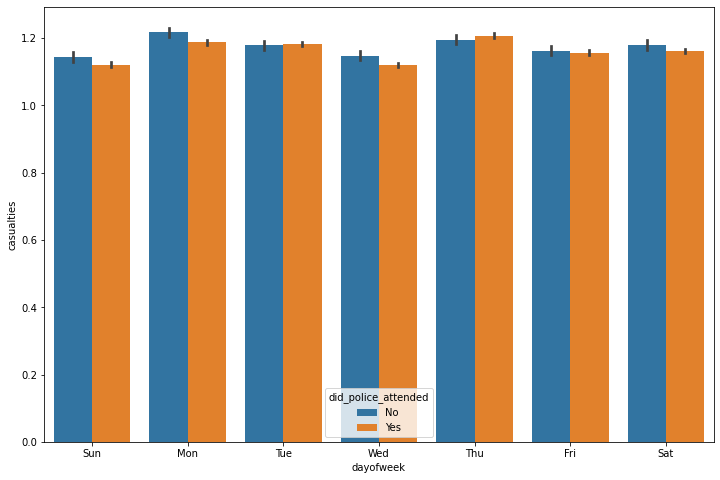

In [134]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="did_police_attended", 
            order=day_ordered)
plt.show()

### casualties Vs Day of Week Vs month

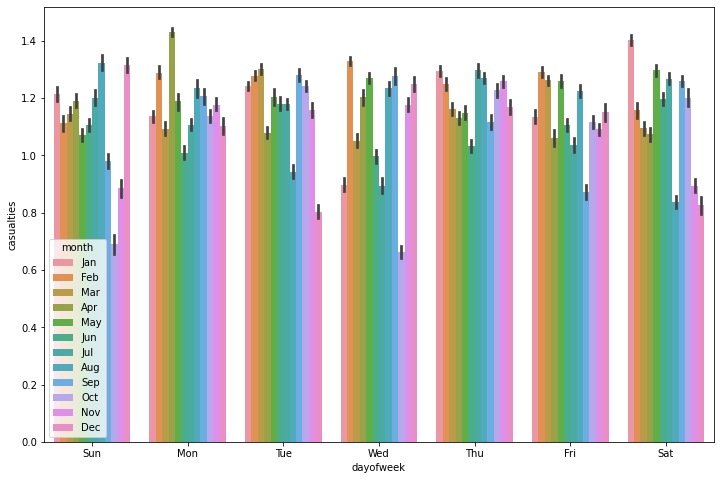

In [135]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="month", 
            order=day_ordered)
plt.show()

### casualties Vs Day of Week Vs season

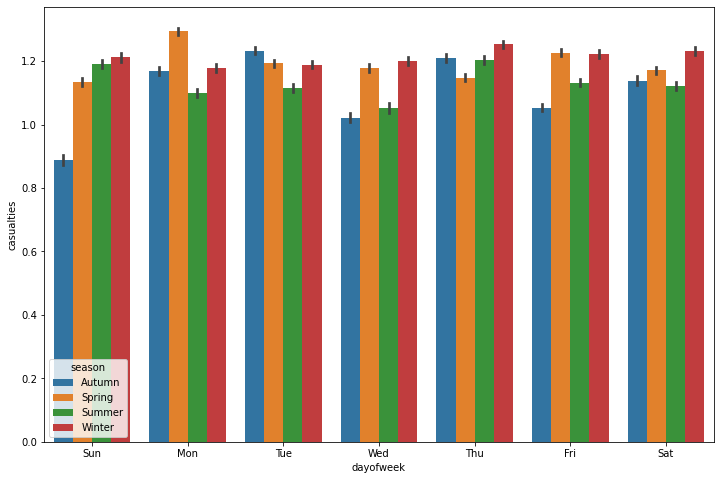

In [136]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="dayofweek", y="casualties", hue="season", 
            order=day_ordered)
plt.show()

The highest average of casualties is reported in Winter season for all the days of week except Monday and Tuesday.

On Monday, highest mean of casualties is reported in "Spring" season, and "Autumn" season is having highest on Tuesday.

The lowest among all the days of week is reported on Sunday in Autumn season. There is a significant difference in average casualties between this lowest value and all other higher values

### Casualties Vs First road class Vs Road type

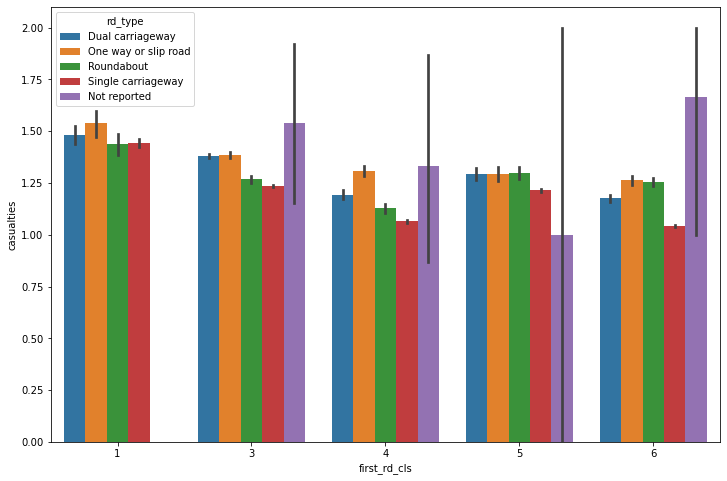

In [137]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="rd_type")
plt.show()

Highest average of casualties is reported in "One way or slip road" and "Dual carriageway" for first road class 1,3 and 5.

For road class 5, the highest average is almost same in "dual carriageway", "Oneway or slip road" and "Roundabout".

For road class 1, the lowest average is almost same for "Roundabout" and "Single carriageway".

All other road class such as 3,4,5, and 6 the lowest average of casualties is observed in "Single carriageway"

### Casualties Vs First road class Vs speed_limit

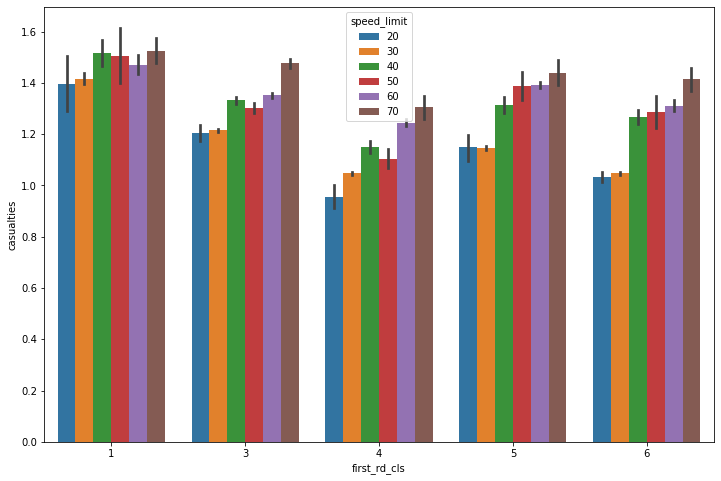

In [138]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="speed_limit")
plt.show()

For all the first road class type, the highest average of casualties is reported in a region having 70 miles/hr speed limit.

The lowest values of average of casualties are observed in the region with speed limit of 20 miles/hr and 30 miles/hr for all the first road class

### Casualties Vs First road class Vs second_rd_cls

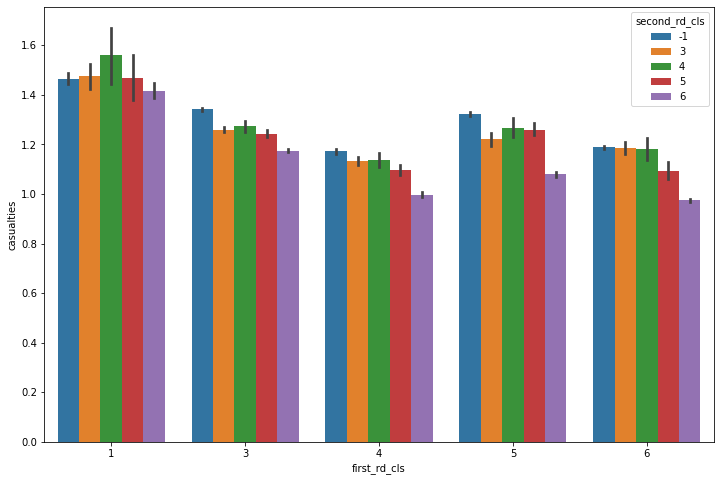

In [139]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="second_rd_cls")
plt.show()

### Casualties Vs First road class Vs pedcross_human

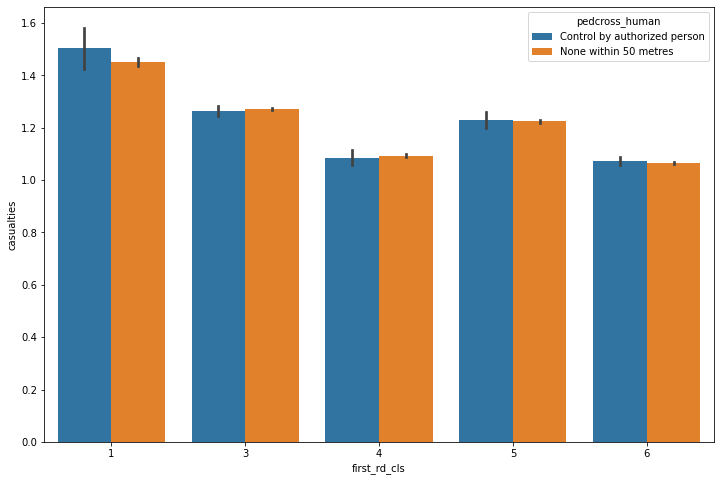

In [140]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="pedcross_human")
plt.show()

There is not much difference in average casualties between pedestrian cross controlled by authorized person or no person involved across all the classes of first class road. 

### Casualties Vs First road class Vs pedcross_physicalfacility

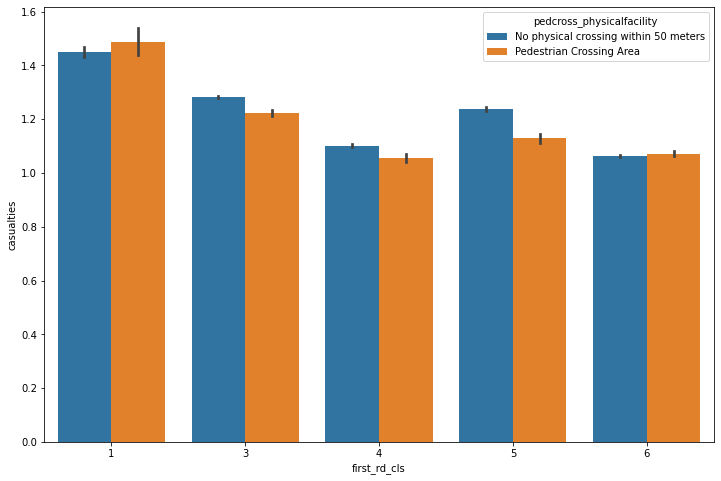

In [141]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="pedcross_physicalfacility")
plt.show()

First road class "1" is having highest number of average casualties and, the average for "pedestrian crossing area" is greater than that of "no physical crossing".

For all other road classes except "1", the average casualties are slighly greater in "No physical crossing" zone than that of "pedestrian crossing area"


### Casualties Vs First road class Vs light_conditions

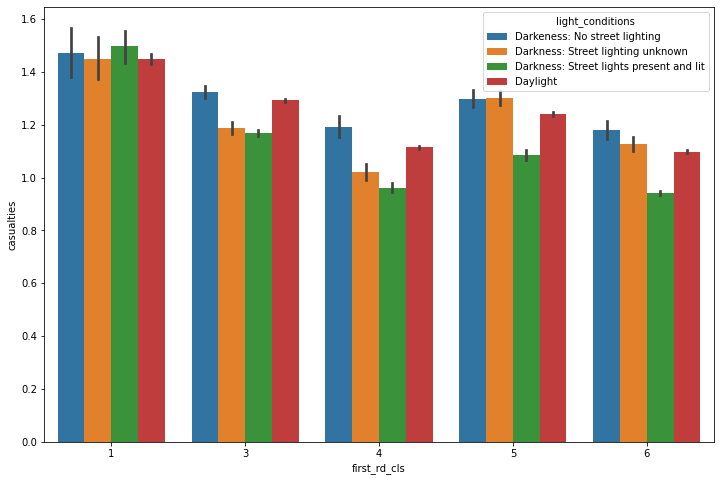

In [142]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="light_conditions")
plt.show()

For all first road class except "1", highest value of average casualties is observed under "Daylight" conditions.

The average casualties under daylight and darkness are in similar pattern for road class "3" and "5", and similar for "4" and "6".



### Casualties Vs First road class Vs weather_conditions

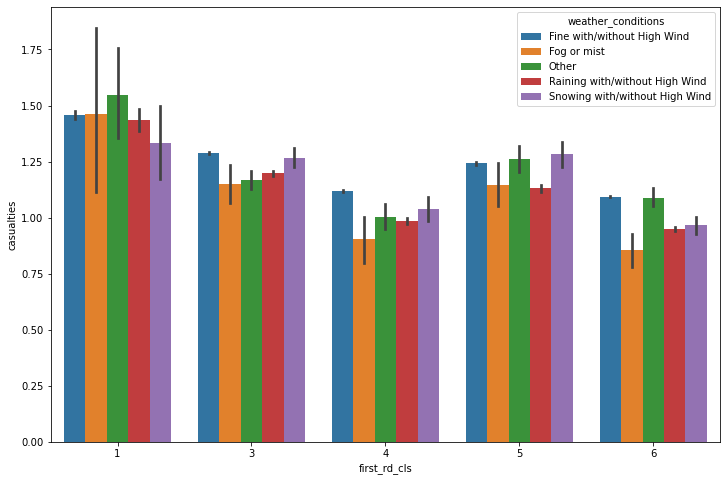

In [143]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="weather_conditions")
plt.show()

### Casualties Vs First road class Vs rd_surface_cond

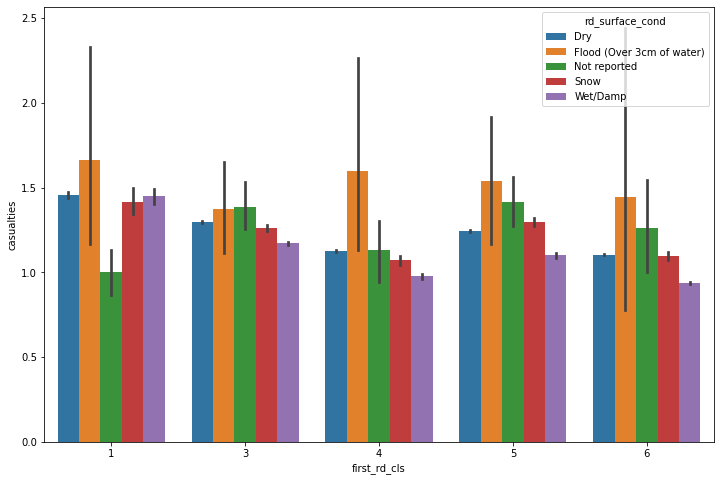

In [144]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="rd_surface_cond")
plt.show()

### Casualties Vs First road class Vs spl_cond_at_site

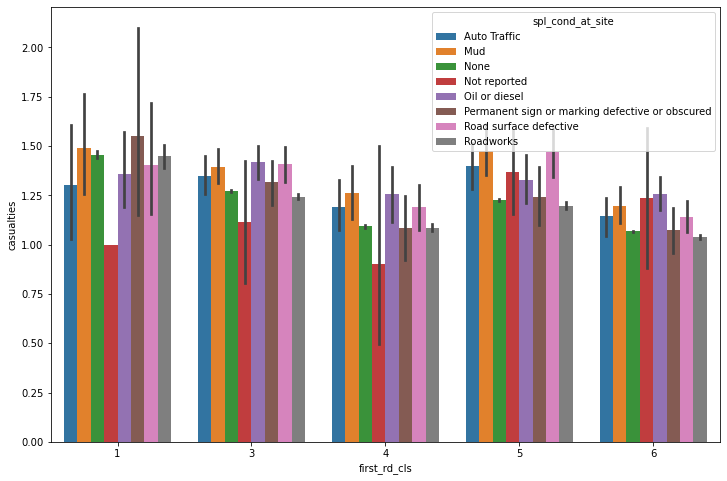

In [145]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="spl_cond_at_site")
plt.show()

### Casualties Vs First road class Vs cariageway_hazards

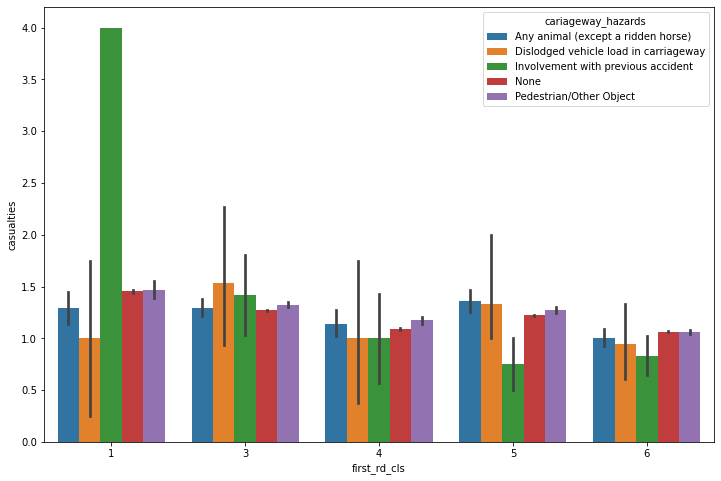

In [146]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="cariageway_hazards")
plt.show()

There is slightly higher value of average casualties when there is any object in the road. This is applicable to all first road class.

### Casualties Vs First road class Vs urban_rural

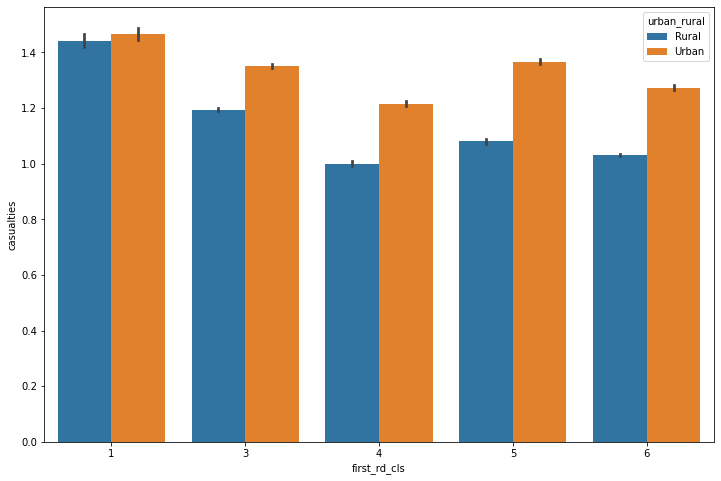

In [147]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="urban_rural")
plt.show()

The highest average of casualties are observed in "rural" areas for all types of first class road.

### Casualties Vs First road class Vs did_police_attended

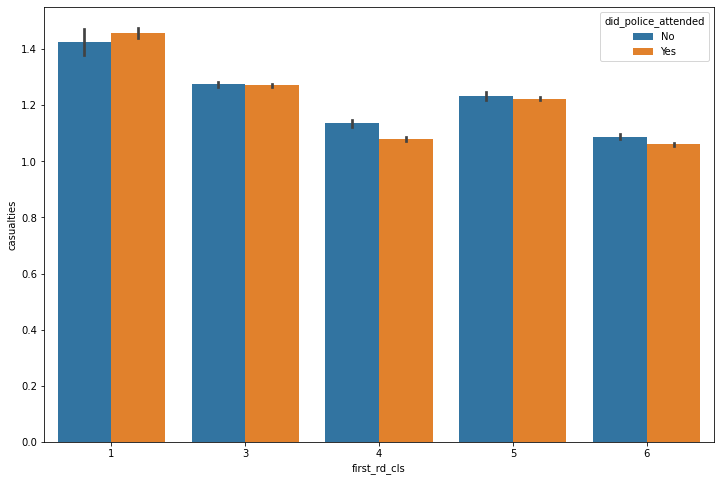

In [148]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="did_police_attended")
plt.show()

### Casualties Vs First road class Vs month

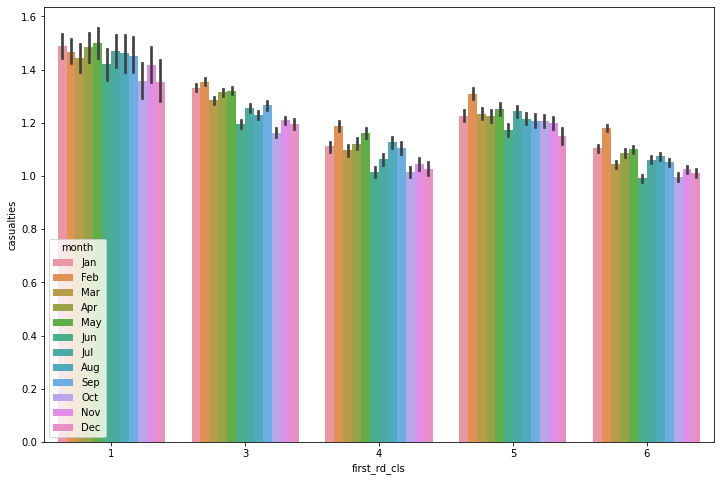

In [149]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="month")
plt.show()

Similar pattern is observed for avaerage casualties across all the first class road type.

### Casualties Vs First road class Vs season

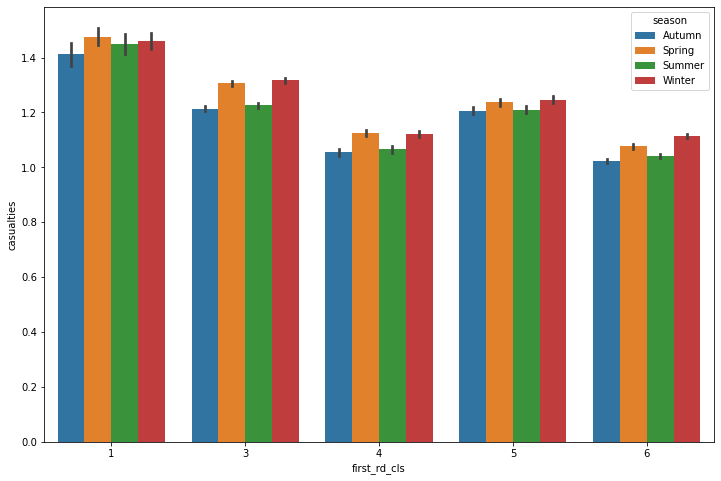

In [150]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="first_rd_cls", y="casualties", hue="season")
plt.show()

highest average of casualties is observed during "spring" and "winter" season across all first road class.

## Read population csv file

In [151]:
pop= pd.read_csv("C:/Users/sachi/Documents/sem2/Project/Dataset/population.csv")
pop.head()

,postcode,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value
0,AL1 1,Total,5453,2715,2738,5408,45,75,225.63,24.2
1,AL1 2,Total,6523,3183,3340,6418,105,77,286.59,22.8
2,AL1 3,Total,4179,2121,2058,4100,79,46,97.12,43.0
3,AL1 4,Total,9799,4845,4954,9765,34,285,244.75,40.0
4,AL1 5,Total,10226,5129,5097,10211,15,133,200.93,50.9


### Rename the columns in population dataframe

In [152]:
pop= pop.rename(columns={'postcode':'area_postcode','Variable: All usual residents; measures: Value':
                        'all_usual_residents', 'Variable: Males; measures: Value':'males',
                        'Variable: Females; measures: Value':'females',
                         'Variable: Lives in a household; measures: Value':'lives_in_household',
                        'Variable: Lives in a communal establishment; measures: Value':'lives_in_communal_establishment',
                        'Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value':
                        'schoolchild_over4yrs','Variable: Area (Hectares); measures: Value':'area_in_hectares',
                        'Variable: Density (number of persons per hectare); measures: Value':'pop_density'})

In [153]:
pop.head()

,area_postcode,Rural Urban,all_usual_residents,males,females,lives_in_household,lives_in_communal_establishment,schoolchild_over4yrs,area_in_hectares,pop_density
0,AL1 1,Total,5453,2715,2738,5408,45,75,225.63,24.2
1,AL1 2,Total,6523,3183,3340,6418,105,77,286.59,22.8
2,AL1 3,Total,4179,2121,2058,4100,79,46,97.12,43.0
3,AL1 4,Total,9799,4845,4954,9765,34,285,244.75,40.0
4,AL1 5,Total,10226,5129,5097,10211,15,133,200.93,50.9


In [154]:
pop.tail()

,area_postcode,Rural Urban,all_usual_residents,males,females,lives_in_household,lives_in_communal_establishment,schoolchild_over4yrs,area_in_hectares,pop_density
8030,SA73 3,Total,5246,2515,2731,5244,2,59,1284.14,4.1
8031,SA8 3,Total,4769,2344,2425,4736,33,59,2061.58,2.3
8032,SA8 4,Total,7787,3816,3971,7673,114,76,3174.90,2.5
8033,SA9 1,Total,7898,3827,4071,7723,175,67,8164.17,1.0
8034,SA9 2,Total,7281,3595,3686,7253,28,69,3306.61,2.2


In [155]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   area_postcode                    8035 non-null   object 
 1   Rural Urban                      8035 non-null   object 
 2   all_usual_residents              8035 non-null   int64  
 3   males                            8035 non-null   int64  
 4   females                          8035 non-null   int64  
 5   lives_in_household               8035 non-null   int64  
 6   lives_in_communal_establishment  8035 non-null   int64  
 7   schoolchild_over4yrs             8035 non-null   int64  
 8   area_in_hectares                 8035 non-null   float64
 9   pop_density                      8035 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 627.9+ KB


In [156]:
# There is no null value in the dataset.
#8035 observations and 10 columns
# 8 numerical columns and 2 object type.
# Need to replace extra space in area_postcode if any
pop['area_postcode'] =pop['area_postcode'].replace("  "," ")
pop['area_postcode'] =pop['area_postcode'].replace("   "," ")
pop['area_postcode'] =pop['area_postcode'].replace("    "," ")

## Read road_network csv

In [157]:
road= pd.read_csv("C:/Users/sachi/Documents/sem2/Project/Dataset/roads_network.csv")
road.head()

,WKT,roadClassi,roadFuncti,formOfWay,length,primaryRou,distance to the nearest point on rd,postcode
0,POINT (-2.3501 56.603923),A Road,A Road,Single Carriageway,2643.0,1.0,1.256769,AB1
1,POINT (-2.021334 57.130142),A Road,A Road,Single Carriageway,2643.0,1.0,1.834101,AB1 9NN
2,POINT (-2.108598 57.146338),A Road,A Road,Single Carriageway,2643.0,1.0,1.830243,AB10 1UH
3,POINT (-2.093928 57.148218),A Road,A Road,Single Carriageway,2643.0,1.0,1.835092,AB10 1YL
4,POINT (-2.116089 57.131671),A Road,A Road,Single Carriageway,2643.0,1.0,1.814373,AB10 6AT


In [158]:
road.tail()

,WKT,roadClassi,roadFuncti,formOfWay,length,primaryRou,distance to the nearest point on rd,postcode
91561,POINT (-0.82061 60.797906),NaN,NaN,NaN,NaN,NaN,NaN,ZE2 9TJ
91562,POINT (-1.289882 59.890975),NaN,NaN,NaN,NaN,NaN,NaN,ZE3 9
91563,POINT (-1.308846 59.882168),NaN,NaN,NaN,NaN,NaN,NaN,ZE3 9JL
91564,POINT (-1.292023 59.877697),NaN,NaN,NaN,NaN,NaN,NaN,ZE3 9JP
91565,POINT (-1.42145 53.450306),A Road,A Road,Single Carriageway,295.0,0.0,0.000645,ZE3 9JW


## Accident dataset

### Split the postcode and create a new column "area_postcode" similar to population dataframe

In [159]:
accident_sorted['area_postcode']= accident_sorted['postcode'].map(lambda x: str(x)[:-2])
accident_sorted.head()

,accident_id,police_force,numberofvehicles,casualties,Date,dayofweek,Time,local_auth_dist,local_auth_highway,first_rd_cls,...,urban_rural,did_police_attended,state,postcode,country,hr,month,season,day_cls,area_postcode
308242,386120,14,1,1,2012-01-01,Sun,2023-06-11 20:00:00,205,E08000025,6,...,Rural,Yes,England,BL1 4LH,United Kingdom,20.0,Jan,Winter,Evening,BL1 4
352400,441631,43,2,2,2012-01-01,Sun,2023-06-11 06:55:00,31,E08000025,6,...,Rural,Yes,England,LA3 1DH,United Kingdom,6.0,Jan,Winter,Morning,LA3 1
19205,24038,5,1,3,2012-01-01,Sun,2023-06-11 16:00:00,93,W06000012,6,...,Rural,Yes,England,WS13 8NP,United Kingdom,16.0,Jan,Winter,Evening,WS13 8
338936,424727,52,2,2,2012-01-01,Sun,2023-06-11 19:30:00,760,E10000030,3,...,Urban,Yes,England,TW8 0DU,United Kingdom,19.0,Jan,Winter,Evening,TW8 0
142307,178181,21,1,3,2012-01-01,Sun,2023-06-11 12:13:00,312,E10000025,3,...,Rural,Yes,England,CB7 4FD,United Kingdom,12.0,Jan,Winter,Afternoon,CB7 4


In [160]:
accident_sorted['area_postcode'].isna()

308242    False
352400    False
19205     False
338936    False
142307    False
          ...  
80926     False
45523     False
104212    False
45909     False
90935     False
Name: area_postcode, Length: 599976, dtype: bool

## Merge population dataframe with accident dataframe on "area_postcode"

In [161]:
acc_pop= pd.merge(accident_sorted,pop, on='area_postcode', how="left", indicator=True)
acc_pop.head()

,accident_id,police_force,numberofvehicles,casualties,Date,dayofweek,Time,local_auth_dist,local_auth_highway,first_rd_cls,...,Rural Urban,all_usual_residents,males,females,lives_in_household,lives_in_communal_establishment,schoolchild_over4yrs,area_in_hectares,pop_density,_merge
0,386120,14,1,1,2012-01-01,Sun,2023-06-11 20:00:00,205,E08000025,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,441631,43,2,2,2012-01-01,Sun,2023-06-11 06:55:00,31,E08000025,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,24038,5,1,3,2012-01-01,Sun,2023-06-11 16:00:00,93,W06000012,6,...,Total,6856.0,3334.0,3522.0,6748.0,108.0,126.0,5204.68,1.3,both
3,424727,52,2,2,2012-01-01,Sun,2023-06-11 19:30:00,760,E10000030,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,178181,21,1,3,2012-01-01,Sun,2023-06-11 12:13:00,312,E10000025,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [162]:
acc_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599976 entries, 0 to 599975
Data columns (total 41 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   accident_id                      599976 non-null  object        
 1   police_force                     599976 non-null  int64         
 2   numberofvehicles                 599976 non-null  int64         
 3   casualties                       599976 non-null  int64         
 4   Date                             599976 non-null  datetime64[ns]
 5   dayofweek                        599976 non-null  category      
 6   Time                             599965 non-null  datetime64[ns]
 7   local_auth_dist                  599976 non-null  object        
 8   local_auth_highway               599976 non-null  object        
 9   first_rd_cls                     599976 non-null  category      
 10  first_rd_number                  599976 non-

## Count plot for Day of week with hue as "casualties"

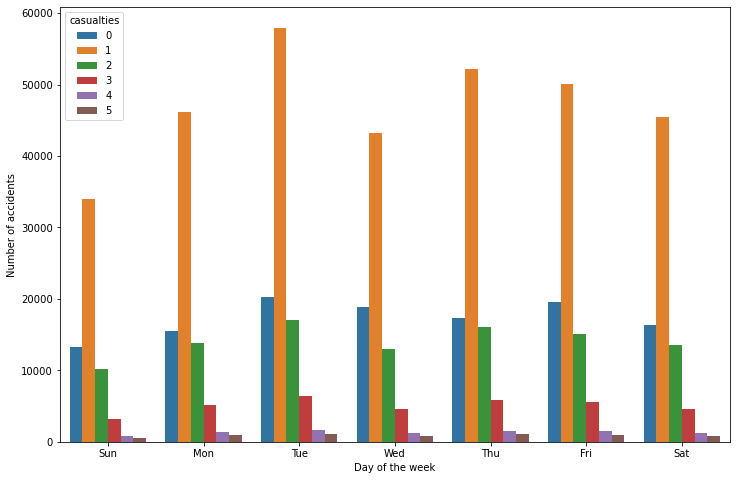

In [163]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='dayofweek', hue="casualties", data=accident_sorted, order=day_ordered)
ax.set(xlabel='Day of the week', ylabel='Number of accidents')
plt.show()

In all the days of week, Highest number of accidents have "1" casualty,
Second highest number of accidents have no casualties. There is a significant difference in highest and the lowest number of accidents.
The number of accidents causing 3 or 4 or 5 casualties are very low.

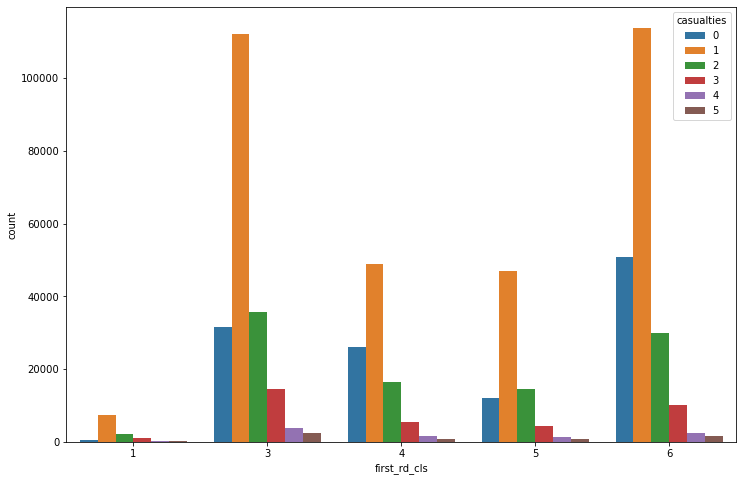

In [164]:
plt.figure(figsize=(12,8))
sns.countplot(x='first_rd_cls', hue="casualties", data=accident_sorted)
plt.show()

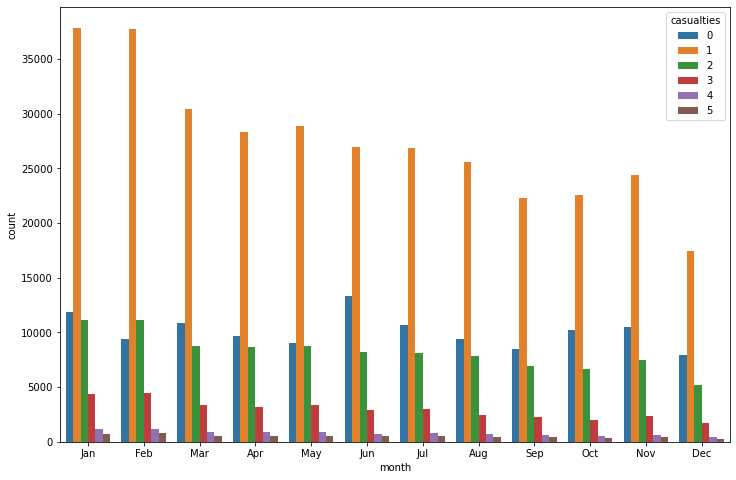

In [165]:
plt.figure(figsize=(12,8))
sns.countplot(x='month', hue="casualties", data=accident_sorted)
plt.show()

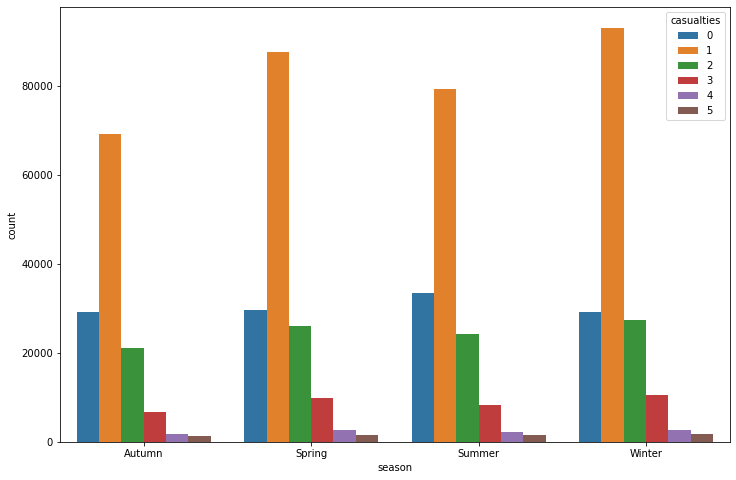

In [166]:
plt.figure(figsize=(12,8))
sns.countplot(x='season', hue="casualties", data=accident_sorted)
plt.show()

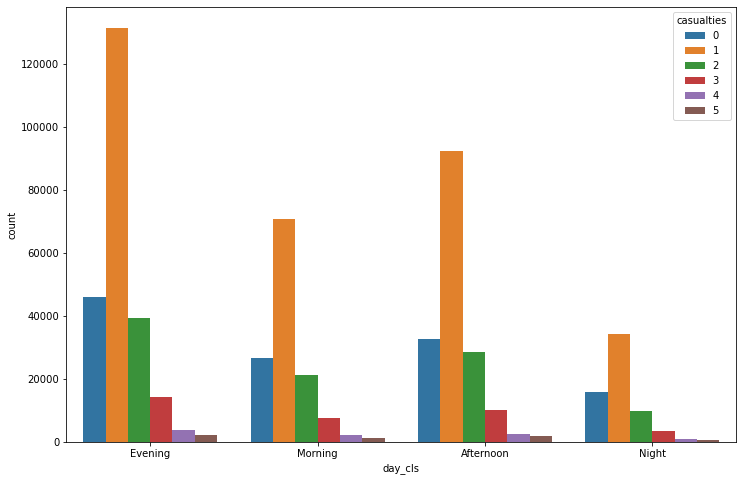

In [167]:
plt.figure(figsize=(12,8))
sns.countplot(x='day_cls', hue="casualties", data=accident_sorted)
plt.show()

In [168]:
#plt.figure(figsize=(12,8))
#accident_sorted.plot.bar(x='day_cls',y= 'casualties',title='Number of casualties' )
#plt.show()

In [169]:
null_map=acc_pop[acc_pop['pop_density'].isnull()] ['postcode']

### To verify the post codes using "pgeocode" package in Python

There are 364861 rows not mapped to any post code.

Need to verify those and confirm if all of them are not from England

In [170]:
#pip install pgeocode
import pgeocode

In [171]:
pgeo= pd.DataFrame(null_map)
pgeo.head()

,postcode
0,BL1 4LH
1,LA3 1DH
3,TW8 0DU
4,CB7 4FD
5,FY1 6LZ


In [172]:
#pgeo['postcode']=pgeo['postcode'].replace(" ","", inplace=True)
pgeo.reset_index(drop=True, inplace=True)

In [173]:
nomi = pgeocode.Nominatim('gb')
nomi.query_postal_code("LU2 9AR")

postal_code                                               LU2
country_code                                               GB
place_name        Cockernhoe, Lilley, Peter's Green, Stopsley
state_name                                            England
state_code                                                ENG
county_name                                     Hertfordshire
county_code                                          11609037
community_name                                            NaN
community_code                                            NaN
latitude                                              51.9114
longitude                                           -0.381975
accuracy                                                  3.0
Name: 0, dtype: object

In [174]:
unique_post= set()
for col in pgeo:
    unique_post.update(pgeo[col])

In [175]:
#[pgeo[i].unique().tolist() for i in pgeo.postcode
print(unique_post)

{'LD2 3YN', 'DH2 2NQ', 'PL6 7FJ', 'CV6 3EX', 'BL9 7PZ', 'WV1 4ND', 'BB5 4HH', 'NE1 6QE', 'LA1 2RS', 'E1 2PJ', 'LE6 0LU', 'B12 8ED', 'G23 5HA', 'DE4 4PU', 'NG1 6LA', 'SK7 3EL', 'NR7 0UP', 'PO2 0QN', 'NG7 5QG', 'TA3 5NW', 'S9 1WD', 'TA1 2PF', 'UB8 3DN', 'BB4 8HH', 'UB8 2UQ', 'S80 4ST', 'CT4 7HB', 'LE5 6RD', 'TR4 8HS', 'W1D 6LU', 'TN3 9NA', 'NN5 6JY', 'E1 8NN', 'KY12 7RA', 'NR9 5PD', 'GU6 7JY', 'LA1 3EF', 'LE7 3BN', 'N11 2BP', 'SA1 4BL', 'PL5 4NR', 'CR0 4XG', 'L37 7DJ', 'SR8 1PX', 'AB30 1QJ', 'E1W 2BG', 'G2 3NW', 'DH6 4NU', 'OX3 0RT', 'AB30 1QL', 'EN1 4RW', 'N9 0TW', 'CW1 2HE', 'G4 0LU', 'HU3 5PA', 'TW5 0TA', 'SR4 6DR', 'RH1 6PP', 'SE3 8DL', 'OX4 2NL', 'EN4 0NS', 'LA4 5PB', 'CM4 9BD', 'SM5 4AS', 'NW1 3QP', 'PR4 4JQ', 'B79 8AA', 'FY4 1NF', 'GL6 6LX', 'N1 9PF', 'CM5 0RB', 'BD1 5AA', 'IP4 1LG', 'B37 7HY', 'ST7 1PS', 'GL1 4PJ', 'TW9 2RE', 'DN1 2EU', 'IG7 5LU', 'EX2 9SZ', 'NE9 6PP', 'HD4 5LT', 'WA7 1TB', 'ME3 7PJ', 'CO3 0HY', 'RG2 8NN', 'S21 1AJ', 'LA8 9JB', 'KT6 4LT', 'CR7 7RL', 'BD6 2DJ', 'D

In [176]:
#pgeo[['state_name','county_name']]= pgeo.apply(lambda row:nomi.query_postal_code(row['postcode'])[['state_name','county_name']], axis=1, result_type='expand')
#pgeo.head()
county= []
#for i in (unique_post):
#    pgeo.apply(lambda x: nomi.query_postal_code(x[i])['county_name'])
#    county.append(i.text)
#print(county)


## Exploration of accident dataset using day_cls variable

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


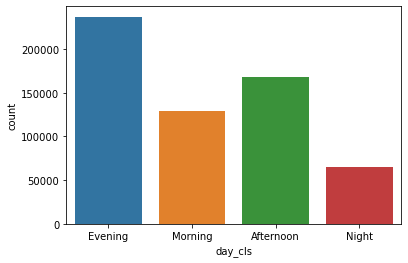

In [177]:
sns.countplot(accident_sorted['day_cls'])
plt.show()

More number of accidents are happened during Evening time, and during Afternoon, significant number is shown which is greater than that of morning time and lesser that the Evenging time.
The lowest number of accidents happened during Night time.

### Casualties Vs day_cls vs season

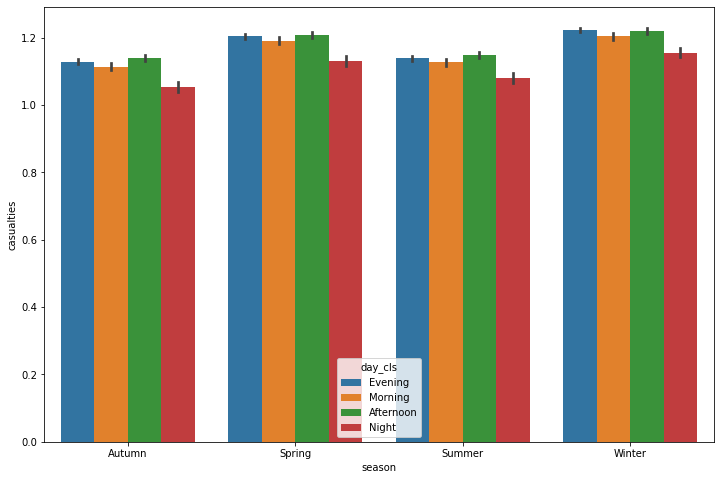

In [178]:
plt.figure(figsize=(12,8))
sns.barplot(data=accident_sorted, x="season", y="casualties", hue="day_cls")
plt.show()

In [179]:
# Stacked Bar chart
#weather= accident_sorted['weather_conditions']
#casualties= accident_sorted['casualties']
#vehicles= accident_sorted['numberofvehicles']
#plt.bar(weather, casualties,label='casualties', color='r')
#plt.bar(weather, vehicles, label='vehicles', bottom=casualties, color='b')
#plt.show()

## Apply poisson regression on accident dataset

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


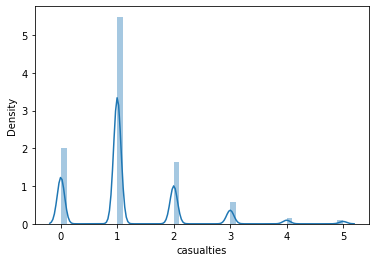

In [180]:
# check the distribution of "casualties" which is considered as the response variable
sns.distplot(accident_sorted['casualties'])
plt.show()

In [181]:
# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

In [182]:
# Fit possion model with a single explanatory variable
# response variable as "casualties" and explanatory variable as "season"
model = glm('casualties ~ season', data = accident_sorted, family = sm.families.Poisson()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             casualties   No. Observations:               599976
Model:                            GLM   Df Residuals:                   599972
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.8225e+05
Date:                Sun, 11 Jun 2023   Deviance:                   4.9049e+05
Time:                        21:03:11   Pearson chi2:                 4.50e+05
No. Iterations:                     5   Pseudo R-squ. (CS):           0.001276
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1135      0.003  

In [183]:
# Extract model coefficients
model.params

Intercept           0.113508
season[T.Spring]    0.064335
season[T.Summer]    0.011220
season[T.Winter]    0.077851
dtype: float64

Effect of each coefficient can be calculated by taking exponential of them.

Here poisson model can be represented as log(λ)= 0.114+ 0.064(season T.Spring)+ 0.011(season T.Summer)+ 0.078(season T.Winter)

Need to analyse the effect of coefficients on the response function λ

exp(β0)- The effect on mean λ when x=0
exp(β1)- Multiplicative effect on mean λ for a 1 unit increase in x

Interpreting coefficient effects:

if β1 >0, exp(β1)>1, λ is exp(β1) times larger than when x=0

if β1 <0, exp(β1)<1, λ is exp(β1) times smaller than when x=0

if β1 =0, exp(β1)=1, λ is exp(β0) multiplicative factor is 1, y and x are not related.

In [184]:
# calculate confidence interval
print(model.conf_int())

                         0         1
Intercept         0.108354  0.118662
season[T.Spring]  0.057480  0.071191
season[T.Summer]  0.004195  0.018245
season[T.Winter]  0.071081  0.084621


In [185]:
# take the exp to calculate the multiplicative effect on mean
print(np.exp(model.conf_int()))

                         0         1
Intercept         1.114442  1.125990
season[T.Spring]  1.059164  1.073786
season[T.Summer]  1.004204  1.018412
season[T.Winter]  1.073668  1.088304


In [186]:
#mean_cas = np.mean(accident_sorted['casualties'])
# for extracting coefficients
#intercept,slope= model.params

#est_lambda = np.exp(intercept) * np.exp(slope * mean_width)

In [187]:
# calculate coefficient effect
np.exp(0.064279)

1.066389880037468

In [188]:
ratio= model.pearson_chi2/ model.df_resid
print(ratio)

0.7501534190085303


In [189]:
#y= accident_sorted['casualties']
#x= accident_sorted["police_force","numberofvehicles","dayofweek","first_rd_cls","rd_type","speed_limit","second_rd_cls",
#                   "pedcross_human","pedcross_physicalfacility","light_conditions","weather_conditions","rd_surface_cond",
#                   "spl_cond_at_site","cariageway_hazards","urban_rural","did_police_attended",
#                   "month","season","day_cls"]
model_overall = glm('casualties ~ police_force+ numberofvehicles+dayofweek+first_rd_cls+rd_type+speed_limit+second_rd_cls+\
pedcross_human+pedcross_physicalfacility+light_conditions+weather_conditions+rd_surface_cond+\
spl_cond_at_site+cariageway_hazards+urban_rural+\
did_police_attended+season+day_cls', data = accident_sorted, family = sm.families.Poisson()).fit()
print(model_overall.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             casualties   No. Observations:               599976
Model:                            GLM   Df Residuals:                   599918
Model Family:                 Poisson   Df Model:                           57
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.6699e+05
Date:                Sun, 11 Jun 2023   Deviance:                   4.5997e+05
Time:                        21:03:35   Pearson chi2:                 4.40e+05
No. Iterations:                     5   Pseudo R-squ. (CS):            0.05081
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [190]:
ratio= model_overall.pearson_chi2/ model.df_resid
print(ratio)

0.7336046683839962


## Apply ANOVA and Feature selection

In [191]:
acc_sorted= accident_sorted

In [192]:
acc_sorted.reset_index(drop=True, inplace=True)

In [193]:
acc_sorted.head()

,accident_id,police_force,numberofvehicles,casualties,Date,dayofweek,Time,local_auth_dist,local_auth_highway,first_rd_cls,...,urban_rural,did_police_attended,state,postcode,country,hr,month,season,day_cls,area_postcode
0,386120,14,1,1,2012-01-01,Sun,2023-06-11 20:00:00,205,E08000025,6,...,Rural,Yes,England,BL1 4LH,United Kingdom,20.0,Jan,Winter,Evening,BL1 4
1,441631,43,2,2,2012-01-01,Sun,2023-06-11 06:55:00,31,E08000025,6,...,Rural,Yes,England,LA3 1DH,United Kingdom,6.0,Jan,Winter,Morning,LA3 1
2,24038,5,1,3,2012-01-01,Sun,2023-06-11 16:00:00,93,W06000012,6,...,Rural,Yes,England,WS13 8NP,United Kingdom,16.0,Jan,Winter,Evening,WS13 8
3,424727,52,2,2,2012-01-01,Sun,2023-06-11 19:30:00,760,E10000030,3,...,Urban,Yes,England,TW8 0DU,United Kingdom,19.0,Jan,Winter,Evening,TW8 0
4,178181,21,1,3,2012-01-01,Sun,2023-06-11 12:13:00,312,E10000025,3,...,Rural,Yes,England,CB7 4FD,United Kingdom,12.0,Jan,Winter,Afternoon,CB7 4


In [194]:
acc_sorted=acc_sorted.drop('accident_id', axis=1)

In [195]:
acc_sorted['local_auth_dist']= acc_sorted['local_auth_dist'].astype('category')
acc_sorted['local_auth_highway']= acc_sorted['local_auth_highway'].astype('category')
acc_sorted['first_rd_number']= acc_sorted['first_rd_number'].astype('category')
acc_sorted['postcode']= acc_sorted['postcode'].astype('category')
acc_sorted['country']= acc_sorted['country'].astype('category')
acc_sorted['month']= acc_sorted['month'].astype('category')
acc_sorted['day_cls']= acc_sorted['day_cls'].astype('category')
acc_sorted['area_postcode']= acc_sorted['area_postcode'].astype('category')

In [196]:
# Label encoder to transform the categorical columns
from sklearn.preprocessing import LabelEncoder
#acc_sorted= acc_sorted['police_force','numberofvehicles','dayofweek','first_rd_cls','rd_type','speed_limit','second_rd_cls',
#                   'pedcross_human','pedcross_physicalfacility','light_conditions','weather_conditions','rd_surface_cond',
#                   'spl_cond_at_site','cariageway_hazards','urban_rural','did_police_attended',
#                   'month','season','day_cls']
class MultiColumnEncoder:
    def __init__(self,columns =None):
        self.columns= columns # array of columns to encode
        
    def fit(self,x,y=None):
        return self
    
    def transform(self,x):
        output=x.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col]= LabelEncoder().fit_transform(output[col])
                
        else:
            for colname,col in output.iteritems():
                output[colname]= LabelEncoder.fit_transform(col)
        return output
    
    def fit_transform(self,x,y=None):
        return self.fit(x,y).transform(x)

In [197]:
cat_col= acc_sorted.select_dtypes(include=["category"]).columns
cat_col

Index(['dayofweek', 'local_auth_dist', 'local_auth_highway', 'first_rd_cls',
       'first_rd_number', 'rd_type', 'speed_limit', 'second_rd_cls',
       'pedcross_human', 'pedcross_physicalfacility', 'light_conditions',
       'weather_conditions', 'rd_surface_cond', 'spl_cond_at_site',
       'cariageway_hazards', 'urban_rural', 'did_police_attended', 'state',
       'postcode', 'country', 'month', 'season', 'day_cls', 'area_postcode'],
      dtype='object')

In [198]:
acc_sorted= MultiColumnEncoder(columns= cat_col).fit_transform(acc_sorted)

In [199]:
acc_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599976 entries, 0 to 599975
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   police_force               599976 non-null  int64         
 1   numberofvehicles           599976 non-null  int64         
 2   casualties                 599976 non-null  int64         
 3   Date                       599976 non-null  datetime64[ns]
 4   dayofweek                  599976 non-null  int32         
 5   Time                       599965 non-null  datetime64[ns]
 6   local_auth_dist            599976 non-null  int32         
 7   local_auth_highway         599976 non-null  int32         
 8   first_rd_cls               599976 non-null  int64         
 9   first_rd_number            599976 non-null  int32         
 10  rd_type                    599976 non-null  int32         
 11  speed_limit                599976 non-null  int64   

In [200]:
acc_sorted_upd= acc_sorted.drop(['Date','Time','local_auth_dist','local_auth_highway','state','postcode','country','hr',
                                 'month','area_postcode'],axis=1)

In [201]:
x= acc_sorted_upd.loc[:,acc_sorted_upd.columns != 'casualties']
y= acc_sorted_upd['casualties']

### F-score and feature selection using select kbest

In [202]:
from sklearn.feature_selection import f_classif, SelectKBest
fs= SelectKBest(score_func=f_classif, k=10)

In [203]:
# Apply feature selection
fs.fit(x,y)

SelectKBest()

In [204]:
def list_cell (x):
    return[math.cell(i) for i in x]

In [205]:
print("p-value :")
print(np.round(fs.pvalues_,4))
print("F Scores:")
print(fs.scores_)

p-value :
[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.0001 0.     0.     0.     0.    ]
F Scores:
[1.35054412e+04 2.66419076e+02 8.68152470e+00 1.10488810e+03
 8.44981900e+01 8.21808472e+02 2.03262706e+03 2.79372933e+03
 7.74209107e+00 1.01372280e+02 2.08223557e+02 6.29886013e+02
 8.80215672e+02 1.48590377e+01 5.23365997e+00 2.98487126e+03
 6.30772965e+01 1.23735814e+02 1.17171070e+02]


In [206]:
features_score= pd.DataFrame(fs.scores_)
features_pvalue= pd.DataFrame(np.round(fs.pvalues_,4))
features= pd.DataFrame(x.columns)
feature_score= pd.concat([features,features_score,features_pvalue],axis=1)
feature_score.columns = ["features","fscore","pvalue"]
print(feature_score.nlargest(10,columns="fscore"))

              features        fscore  pvalue
0         police_force  13505.441193     0.0
15         urban_rural   2984.871264     0.0
7        second_rd_cls   2793.729335     0.0
6          speed_limit   2032.627064     0.0
3         first_rd_cls   1104.888098     0.0
12     rd_surface_cond    880.215672     0.0
5              rd_type    821.808472     0.0
11  weather_conditions    629.886013     0.0
1     numberofvehicles    266.419076     0.0
10    light_conditions    208.223557     0.0


In [207]:
from statsmodels.formula.api import ols
model= ols('casualties ~ police_force+ numberofvehicles+dayofweek+first_rd_cls+rd_type+speed_limit+second_rd_cls+\
pedcross_human+pedcross_physicalfacility+light_conditions+weather_conditions+rd_surface_cond+\
spl_cond_at_site+cariageway_hazards+urban_rural+\
did_police_attended+season+day_cls', data = acc_sorted_upd).fit()

In [208]:
anova_result= sm.stats.anova_lm(model, typ=2)
print(anova_result)

                                  sum_sq        df             F  \
police_force                14893.952041       1.0  18134.919384   
numberofvehicles              411.895555       1.0    501.525227   
dayofweek                       6.885514       1.0      8.383822   
first_rd_cls                  144.223608       1.0    175.607085   
rd_type                       604.942731       1.0    736.580032   
speed_limit                   924.298362       1.0   1125.428378   
second_rd_cls                1432.320315       1.0   1743.997387   
pedcross_human                  9.572539       1.0     11.655551   
pedcross_physicalfacility      19.603434       1.0     23.869198   
light_conditions              475.095861       1.0    578.478104   
weather_conditions            634.956659       1.0    773.125077   
rd_surface_cond              1139.879364       1.0   1387.920433   
spl_cond_at_site                7.721499       1.0      9.401719   
cariageway_hazards             15.466900       1

In [209]:
#trainx,testx,trainy,testy= train_test_split(x,y)

In [210]:
# Power 0= Normal, 1= poisson, 2= Gamma, 3= Inverse Gaussian
#scaler = preprocessing.StandardScaler().fit(trainx)
#clf = linear_model.GammaRegressor()
#trainx_scaled = scaler.transform(trainx)
#reg= linear_model.TweedieRegressor(power=1, link='log')
#reg.fit(trainx_scaled,trainy)
#reg.predict(testx)
#sklearn.metric

In [211]:
crosstabresult= pd.crosstab(index=accident_sorted['day_cls'],columns=accident_sorted['season'])
print(crosstabresult)

season     Autumn  Spring  Summer  Winter
day_cls                                  
Afternoon   36055   44251   41715   46205
Evening     50792   62231   58812   65053
Morning     27911   34043   32106   35516
Night       14334   16859   16192   17901


<AxesSubplot:xlabel='day_cls'>

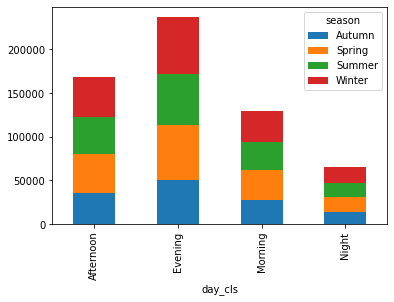

In [212]:
crosstabresult.plot.bar(stacked=True)

In [213]:
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import chi2_contingency

In [214]:
acc_categorical= accident_sorted[['casualties','dayofweek','first_rd_cls','rd_type','speed_limit','second_rd_cls','pedcross_human','pedcross_physicalfacility',
                               'light_conditions','weather_conditions','rd_surface_cond',
                               'spl_cond_at_site','cariageway_hazards','urban_rural',
                               'did_police_attended','season','day_cls']]

## Building a matrix for Cramer's v test results

In [215]:
#acc_categorical.head()

In [216]:
acc_categorical.isnull().sum()

casualties                   0
dayofweek                    0
first_rd_cls                 0
rd_type                      0
speed_limit                  0
second_rd_cls                0
pedcross_human               0
pedcross_physicalfacility    0
light_conditions             0
weather_conditions           0
rd_surface_cond              0
spl_cond_at_site             0
cariageway_hazards           0
urban_rural                  0
did_police_attended          0
season                       0
day_cls                      0
dtype: int64

## Day of week related to Casualties

In [217]:
acc_categorical['dayofweek'].value_counts()

Tue    104578
Thu     93921
Fri     92566
Mon     82827
Sat     82119
Wed     81915
Sun     62050
Name: dayofweek, dtype: int64

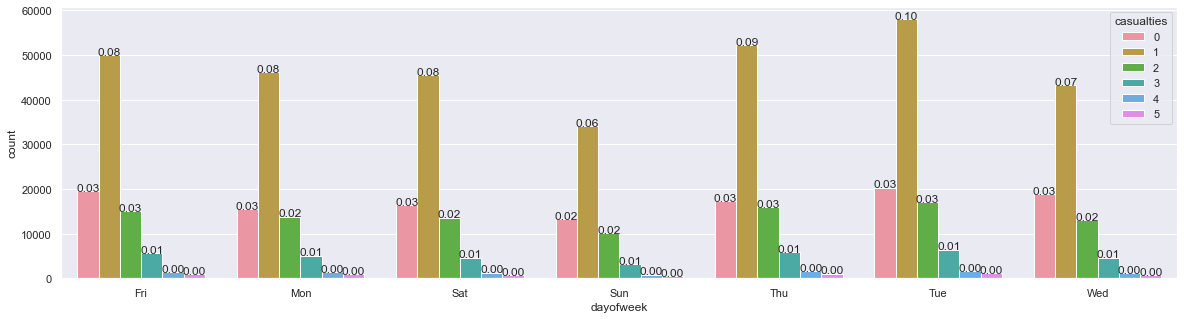

In [218]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='dayofweek', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [219]:
pd.crosstab(index= acc_categorical['dayofweek'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
dayofweek,,,,,,,
Fri,19500,50063,15103,5553,1449,898,92566
Mon,15546,46170,13814,5096,1307,894,82827
Sat,16349,45461,13593,4647,1282,787,82119
Sun,13315,34031,10174,3166,840,524,62050
Thu,17292,52152,16006,5872,1528,1071,93921
Tue,20316,57959,17090,6434,1655,1124,104578
Wed,18932,43281,13029,4628,1257,788,81915
All,121250,329117,98809,35396,9318,6086,599976


In [220]:
dow_cas=pd.crosstab(index=acc_categorical['dayofweek'], columns=acc_categorical['casualties'])
dow_cas

casualties,0,1,2,3,4,5
dayofweek,,,,,,
Fri,19500,50063,15103,5553,1449,898
Mon,15546,46170,13814,5096,1307,894
Sat,16349,45461,13593,4647,1282,787
Sun,13315,34031,10174,3166,840,524
Thu,17292,52152,16006,5872,1528,1071
Tue,20316,57959,17090,6434,1655,1124
Wed,18932,43281,13029,4628,1257,788


In [221]:
dow_cas.iloc[0].values

array([19500, 50063, 15103,  5553,  1449,   898], dtype=int64)

In [222]:
from scipy import stats
(chi2, p, dof,_)= stats.chi2_contingency([dow_cas.iloc[0].values,dow_cas.iloc[1].values,dow_cas.iloc[2].values,
                                         dow_cas.iloc[3].values,dow_cas.iloc[4].values,dow_cas.iloc[5].values,
                                         dow_cas.iloc[6].values])

In [223]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 1025.4087063870074
p-value : 2.2133891480416945e-196
Degree of freedom : 30


In [224]:
# Cramers test

In [225]:
#np.sqrt((chi2/(dow_cas.shape[0]))/6)
np.sqrt((chi2/599976)/(6-1))

0.018488282094126382

Even though the cramer's v test value was very low, there could be a statistical significance for this value. A weak relation between day of week and casualties. 

## First road class and Casualties

In [226]:
acc_categorical['first_rd_cls'].value_counts()

6    209064
3    200267
4     99353
5     79863
1     11429
Name: first_rd_cls, dtype: int64

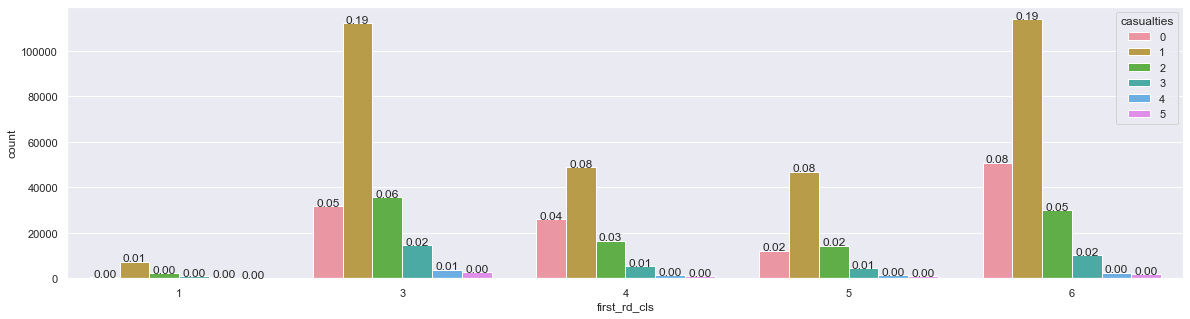

In [227]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='first_rd_cls', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [228]:
pd.crosstab(index= acc_categorical['first_rd_cls'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
first_rd_cls,,,,,,,
1,486,7334,2153,1004,288,164,11429
3,31631,112138,35731,14470,3745,2552,200267
4,26123,48893,16531,5415,1534,857,99353
5,12155,46861,14415,4364,1258,810,79863
6,50855,113891,29979,10143,2493,1703,209064
All,121250,329117,98809,35396,9318,6086,599976


In [229]:
frd_class_cas=pd.crosstab(index=acc_categorical['first_rd_cls'], columns=acc_categorical['casualties'])
frd_class_cas

casualties,0,1,2,3,4,5
first_rd_cls,,,,,,
1,486,7334,2153,1004,288,164
3,31631,112138,35731,14470,3745,2552
4,26123,48893,16531,5415,1534,857
5,12155,46861,14415,4364,1258,810
6,50855,113891,29979,10143,2493,1703


In [230]:
(chi2, p, dof,_)= stats.chi2_contingency([frd_class_cas.iloc[0].values,frd_class_cas.iloc[1].values,frd_class_cas.iloc[2].values,
                                         frd_class_cas.iloc[3].values,frd_class_cas.iloc[4].values])

In [231]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 11755.649052345512
p-value : 0.0
Degree of freedom : 20


In [232]:
np.sqrt((chi2/599976)/(5-1))

0.06998844933605532

## Road type and Casualties

In [233]:
acc_categorical['rd_type'].value_counts()

Single carriageway      477029
Dual carriageway         60872
Roundabout               34522
One way or slip road     27520
Not reported                33
Name: rd_type, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


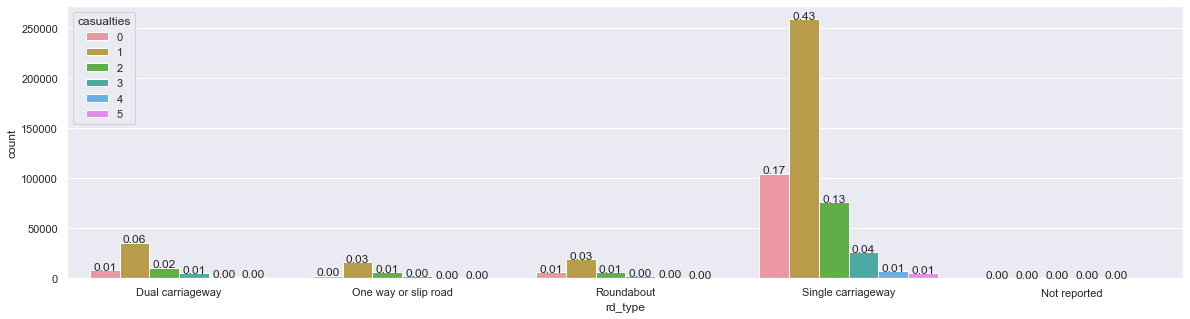

In [234]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='rd_type', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [235]:
pd.crosstab(index= acc_categorical['rd_type'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
rd_type,,,,,,,
Dual carriageway,8089,35457,10616,4761,1186,763,60872
One way or slip road,2687,16340,5842,1969,462,220,27520
Roundabout,5984,18864,6330,2399,578,367,34522
Single carriageway,104486,258441,76010,26265,7091,4736,477029
Not reported,4,15,11,2,1,0,33
All,121250,329117,98809,35396,9318,6086,599976


In [236]:

rd_typ_cas=pd.crosstab(index=acc_categorical['rd_type'], columns=acc_categorical['casualties'])
rd_typ_cas

casualties,0,1,2,3,4,5
rd_type,,,,,,
Dual carriageway,8089,35457,10616,4761,1186,763
One way or slip road,2687,16340,5842,1969,462,220
Roundabout,5984,18864,6330,2399,578,367
Single carriageway,104486,258441,76010,26265,7091,4736
Not reported,4,15,11,2,1,0


In [237]:
(chi2, p, dof,_)= stats.chi2_contingency([rd_typ_cas.iloc[0].values,rd_typ_cas.iloc[1].values,rd_typ_cas.iloc[2].values,
                                         rd_typ_cas.iloc[3].values,rd_typ_cas.iloc[4].values])

In [238]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 5370.223424306814
p-value : 0.0
Degree of freedom : 20


In [239]:
np.sqrt((chi2/599976)/(5-1))

0.04730414993174704

## Speed Limit and Casualties

In [240]:
acc_categorical['speed_limit'].value_counts()

30    426817
60     83769
40     41123
70     17378
20     15783
50     15106
Name: speed_limit, dtype: int64

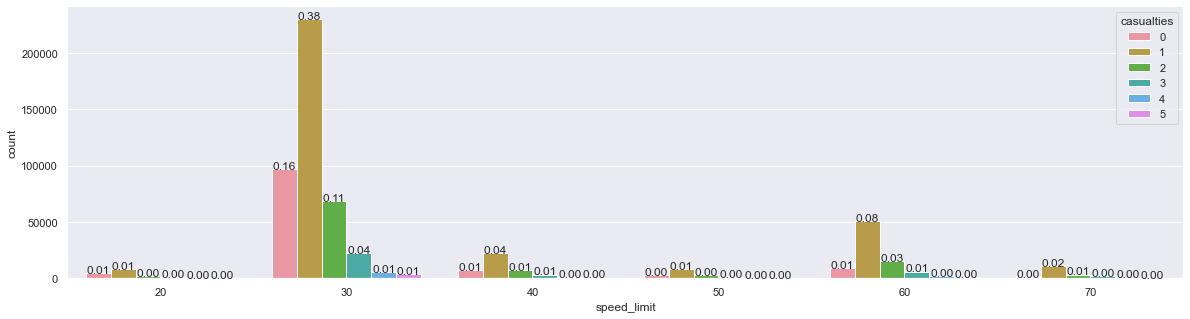

In [241]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='speed_limit', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [242]:
pd.crosstab(index= acc_categorical['speed_limit'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
speed_limit,,,,,,,
20,4369,7884,2088,924,307,211,15783
30,97026,229730,68628,22514,5451,3468,426817
40,7015,22081,7219,3229,945,634,41123
50,2851,7896,2564,1193,369,233,15106
60,8755,50947,15155,5924,1778,1210,83769
70,1234,10579,3155,1612,468,330,17378
All,121250,329117,98809,35396,9318,6086,599976


In [243]:
spd_cas=pd.crosstab(index=acc_categorical['speed_limit'], columns=acc_categorical['casualties'])
spd_cas

casualties,0,1,2,3,4,5
speed_limit,,,,,,
20,4369,7884,2088,924,307,211
30,97026,229730,68628,22514,5451,3468
40,7015,22081,7219,3229,945,634
50,2851,7896,2564,1193,369,233
60,8755,50947,15155,5924,1778,1210
70,1234,10579,3155,1612,468,330


In [244]:
(chi2, p, dof,_)= stats.chi2_contingency([spd_cas.iloc[0].values,spd_cas.iloc[1].values,spd_cas.iloc[2].values,
                                         spd_cas.iloc[3].values,spd_cas.iloc[4].values,spd_cas.iloc[5].values])

In [245]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 11173.406064722683
p-value : 0.0
Degree of freedom : 25


In [246]:
np.sqrt((chi2/599976)/(6-1))

0.061029645853042706

## Second rd class and Casualties

In [247]:
acc_categorical['second_rd_cls'].value_counts()

-1    255775
6     247719
3      47286
5      31567
4      17629
Name: second_rd_cls, dtype: int64

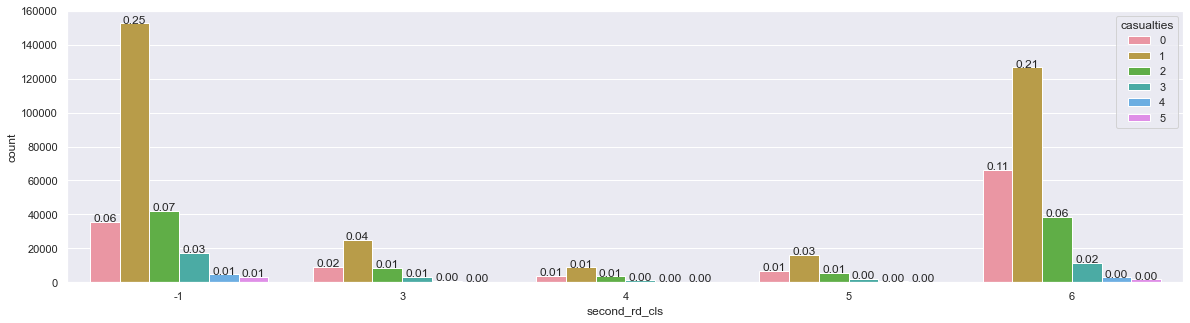

In [248]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='second_rd_cls', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [249]:
pd.crosstab(index= acc_categorical['second_rd_cls'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
second_rd_cls,,,,,,,
-1,35560,152539,42234,17253,4810,3379,255775
3,9003,25045,8707,3336,766,429,47286
4,3716,8722,3430,1239,324,198,17629
5,6725,16181,5716,2061,559,325,31567
6,66246,126630,38722,11507,2859,1755,247719
All,121250,329117,98809,35396,9318,6086,599976


In [250]:
sec_rdcls_cas=pd.crosstab(index=acc_categorical['second_rd_cls'], columns=acc_categorical['casualties'])
sec_rdcls_cas

casualties,0,1,2,3,4,5
second_rd_cls,,,,,,
-1,35560,152539,42234,17253,4810,3379
3,9003,25045,8707,3336,766,429
4,3716,8722,3430,1239,324,198
5,6725,16181,5716,2061,559,325
6,66246,126630,38722,11507,2859,1755


In [251]:
(chi2, p, dof,_)= stats.chi2_contingency([sec_rdcls_cas.iloc[0].values,sec_rdcls_cas.iloc[1].values,sec_rdcls_cas.iloc[2].values,
                                         sec_rdcls_cas.iloc[3].values,sec_rdcls_cas.iloc[4].values])

In [252]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 14640.539076770985
p-value : 0.0
Degree of freedom : 20


In [253]:
np.sqrt((chi2/599976)/(5-1))

0.0781054968236334

## pedcross_human and casualties

In [254]:
acc_categorical['pedcross_human'].value_counts()

None within 50 metres           569851
Control by authorized person     30125
Name: pedcross_human, dtype: int64

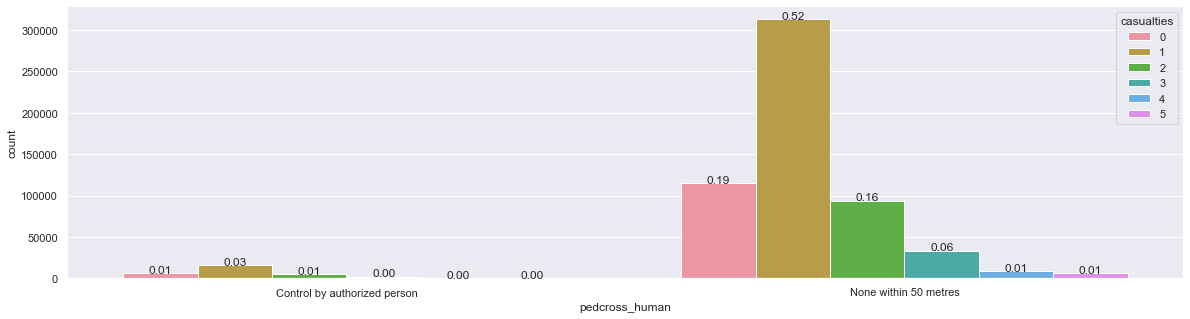

In [255]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='pedcross_human', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [256]:
pd.crosstab(index= acc_categorical['pedcross_human'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
pedcross_human,,,,,,,
Control by authorized person,6425,16195,4819,1860,498,328,30125
None within 50 metres,114825,312922,93990,33536,8820,5758,569851
All,121250,329117,98809,35396,9318,6086,599976


In [257]:
pd_human_cas=pd.crosstab(index=acc_categorical['pedcross_human'], columns=acc_categorical['casualties'])
pd_human_cas

casualties,0,1,2,3,4,5
pedcross_human,,,,,,
Control by authorized person,6425,16195,4819,1860,498,328
None within 50 metres,114825,312922,93990,33536,8820,5758


In [258]:
(chi2, p, dof,_)= stats.chi2_contingency([pd_human_cas.iloc[0].values,pd_human_cas.iloc[1].values])

In [259]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 38.70834501250457
p-value : 2.718445490398467e-07
Degree of freedom : 5


In [260]:
np.sqrt((chi2/599976)/(2-1))

0.008032215697659944

## pedcross_physicalfacility and casualties

In [261]:
acc_categorical['pedcross_physicalfacility'].value_counts()

No physical crossing within 50 meters    504048
Pedestrian Crossing Area                  95928
Name: pedcross_physicalfacility, dtype: int64

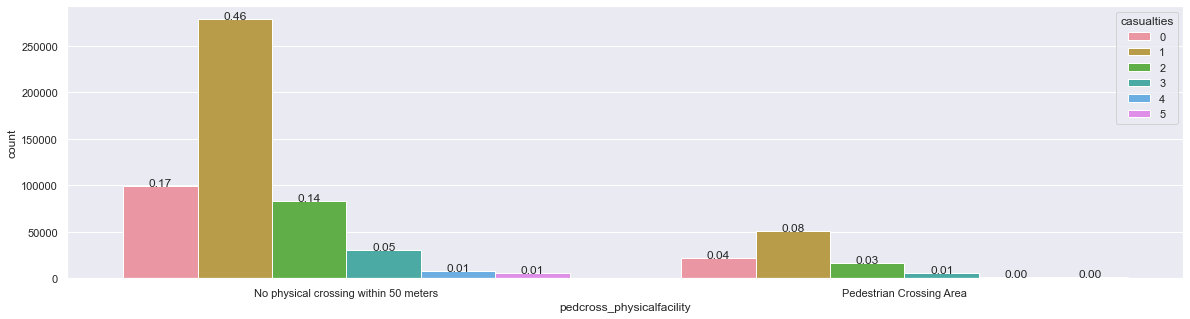

In [262]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='pedcross_physicalfacility', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [263]:
pd.crosstab(index= acc_categorical['pedcross_physicalfacility'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
pedcross_physicalfacility,,,,,,,
No physical crossing within 50 meters,99501,278666,82767,29854,8004,5256,504048
Pedestrian Crossing Area,21749,50451,16042,5542,1314,830,95928
All,121250,329117,98809,35396,9318,6086,599976


In [264]:
pd_phy_cas=pd.crosstab(index=acc_categorical['pedcross_physicalfacility'], columns=acc_categorical['casualties'])
pd_phy_cas

casualties,0,1,2,3,4,5
pedcross_physicalfacility,,,,,,
No physical crossing within 50 meters,99501,278666,82767,29854,8004,5256
Pedestrian Crossing Area,21749,50451,16042,5542,1314,830


In [265]:
(chi2, p, dof,_)= stats.chi2_contingency([pd_phy_cas.iloc[0].values,pd_phy_cas.iloc[1].values])

In [266]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 506.4386250029785
p-value : 3.2540857726437754e-107
Degree of freedom : 5


In [267]:
np.sqrt((chi2/599976)/(2-1))

0.029053367084221432

## Light conditions and Casualties

In [268]:
acc_categorical['light_conditions'].value_counts()

Daylight                                   464614
Darkness: Street lights present and lit     98329
Darkness: Street lighting unknown           21242
Darkeness: No street lighting               15791
Name: light_conditions, dtype: int64

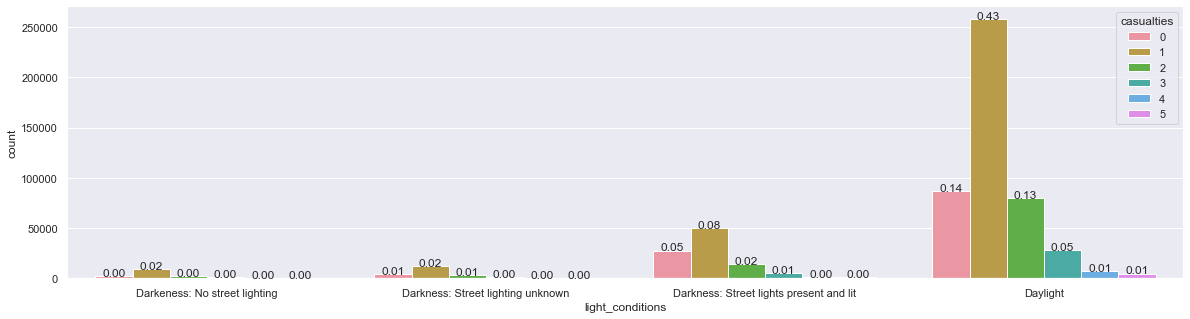

In [269]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='light_conditions', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [270]:
pd.crosstab(index= acc_categorical['light_conditions'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
light_conditions,,,,,,,
Darkeness: No street lighting,2455,9220,2416,1061,356,283,15791
Darkness: Street lighting unknown,4425,11767,3016,1336,413,285,21242
Darkness: Street lights present and lit,27470,50220,13739,4848,1215,837,98329
Daylight,86900,257910,79638,28151,7334,4681,464614
All,121250,329117,98809,35396,9318,6086,599976


In [271]:
light_cas=pd.crosstab(index=acc_categorical['light_conditions'], columns=acc_categorical['casualties'])
light_cas

casualties,0,1,2,3,4,5
light_conditions,,,,,,
Darkeness: No street lighting,2455,9220,2416,1061,356,283
Darkness: Street lighting unknown,4425,11767,3016,1336,413,285
Darkness: Street lights present and lit,27470,50220,13739,4848,1215,837
Daylight,86900,257910,79638,28151,7334,4681


In [272]:
(chi2, p, dof,_)= stats.chi2_contingency([light_cas.iloc[0].values,light_cas.iloc[1].values,light_cas.iloc[2].values,
                                         light_cas.iloc[3].values])

In [273]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 4988.6748389906
p-value : 0.0
Degree of freedom : 15


In [274]:
np.sqrt((chi2/599976)/(4-1))

0.05264595792211274

## weather conditions and casualties

In [275]:
acc_categorical['weather_conditions'].value_counts()

Fine with/without High Wind       485391
Raining with/without High Wind    101075
Snowing with/without High Wind      6257
Other                               5794
Fog or mist                         1459
Name: weather_conditions, dtype: int64

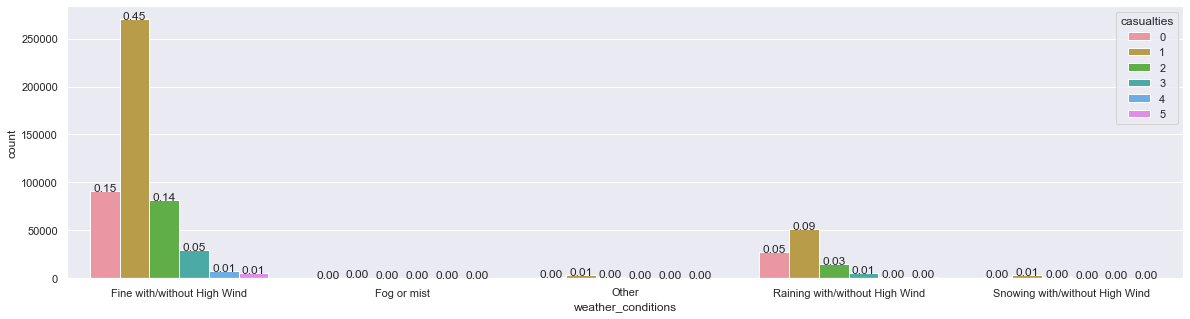

In [276]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='weather_conditions', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [277]:
pd.crosstab(index= acc_categorical['weather_conditions'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
weather_conditions,,,,,,,
Fine with/without High Wind,91262,270093,81778,29514,7683,5061,485391
Fog or mist,401,759,215,62,14,8,1459
Other,1145,3365,840,303,81,60,5794
Raining with/without High Wind,27042,51508,15028,5172,1424,901,101075
Snowing with/without High Wind,1400,3392,948,345,116,56,6257
All,121250,329117,98809,35396,9318,6086,599976


In [278]:
wea_cas=pd.crosstab(index=acc_categorical['weather_conditions'], columns=acc_categorical['casualties'])
wea_cas

casualties,0,1,2,3,4,5
weather_conditions,,,,,,
Fine with/without High Wind,91262,270093,81778,29514,7683,5061
Fog or mist,401,759,215,62,14,8
Other,1145,3365,840,303,81,60
Raining with/without High Wind,27042,51508,15028,5172,1424,901
Snowing with/without High Wind,1400,3392,948,345,116,56


In [279]:
(chi2, p, dof,_)= stats.chi2_contingency([wea_cas.iloc[0].values,wea_cas.iloc[1].values,wea_cas.iloc[2].values,
                                         wea_cas.iloc[3].values,wea_cas.iloc[4].values])

In [280]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 3434.0864154236847
p-value : 0.0
Degree of freedom : 20


In [281]:
np.sqrt((chi2/599976)/(5-1))

0.03782759015352341

## Road surface conditions and Casualties

In [282]:
acc_categorical['rd_surface_cond'].value_counts()

Dry                          448161
Wet/Damp                     120857
Snow                          30371
Not reported                    490
Flood (Over 3cm of water)        97
Name: rd_surface_cond, dtype: int64

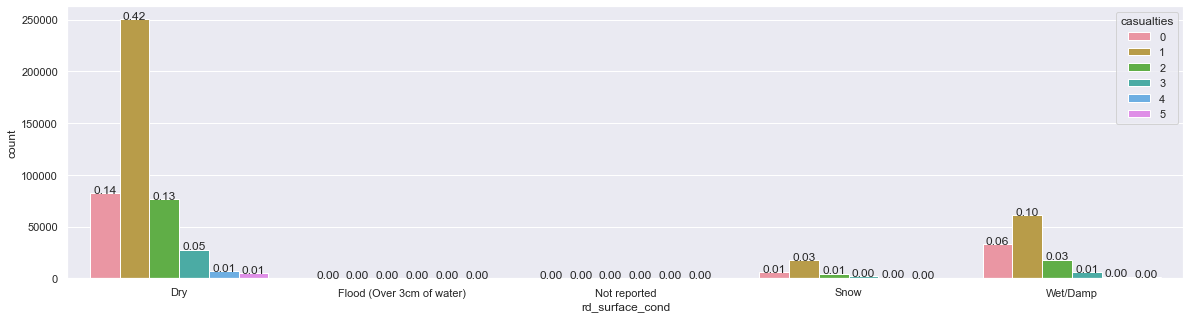

In [283]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='rd_surface_cond', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [284]:
pd.crosstab(index= acc_categorical['rd_surface_cond'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
rd_surface_cond,,,,,,,
Dry,82331,250203,76147,27759,7074,4647,448161
Flood (Over 3cm of water),6,61,15,10,3,2,97
Not reported,38,333,70,28,13,8,490
Snow,5587,17298,4593,1878,610,405,30371
Wet/Damp,33288,61222,17984,5721,1618,1024,120857
All,121250,329117,98809,35396,9318,6086,599976


In [285]:
rd_sur_cas=pd.crosstab(index=acc_categorical['rd_surface_cond'], columns=acc_categorical['casualties'])
rd_sur_cas

casualties,0,1,2,3,4,5
rd_surface_cond,,,,,,
Dry,82331,250203,76147,27759,7074,4647
Flood (Over 3cm of water),6,61,15,10,3,2
Not reported,38,333,70,28,13,8
Snow,5587,17298,4593,1878,610,405
Wet/Damp,33288,61222,17984,5721,1618,1024


In [286]:
(chi2, p, dof,_)= stats.chi2_contingency([rd_sur_cas.iloc[0].values,rd_sur_cas.iloc[1].values,rd_sur_cas.iloc[2].values,
                                         rd_sur_cas.iloc[3].values,rd_sur_cas.iloc[4].values])

In [287]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 5367.670362388791
p-value : 0.0
Degree of freedom : 20


In [288]:
np.sqrt((chi2/599976)/(5-1))

0.04729290414441994

## spl_cond_at_site and Casualties

In [289]:
acc_categorical['spl_cond_at_site'].value_counts()

None                                               535613
Roadworks                                           57733
Oil or diesel                                        1575
Road surface defective                               1512
Auto Traffic                                         1415
Mud                                                  1236
Permanent sign or marking defective or obscured       819
Not reported                                           73
Name: spl_cond_at_site, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


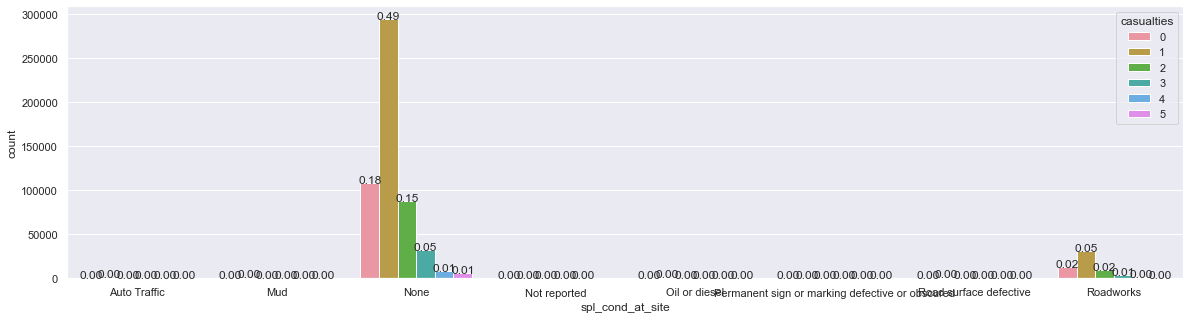

In [290]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='spl_cond_at_site', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [291]:
pd.crosstab(index= acc_categorical['spl_cond_at_site'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
spl_cond_at_site,,,,,,,
Auto Traffic,252,766,245,94,29,29,1415
Mud,132,739,236,91,25,13,1236
None,107787,294281,88060,31717,8333,5435,535613
Not reported,10,44,16,2,1,0,73
Oil or diesel,204,911,285,108,39,28,1575
Permanent sign or marking defective or obscured,159,448,132,56,19,5,819
Road surface defective,223,851,276,106,29,27,1512
Roadworks,12483,31077,9559,3222,843,549,57733
All,121250,329117,98809,35396,9318,6086,599976


In [292]:
spl_cond_cas=pd.crosstab(index=acc_categorical['spl_cond_at_site'], columns=acc_categorical['casualties'])
spl_cond_cas

casualties,0,1,2,3,4,5
spl_cond_at_site,,,,,,
Auto Traffic,252,766,245,94,29,29
Mud,132,739,236,91,25,13
None,107787,294281,88060,31717,8333,5435
Not reported,10,44,16,2,1,0
Oil or diesel,204,911,285,108,39,28
Permanent sign or marking defective or obscured,159,448,132,56,19,5
Road surface defective,223,851,276,106,29,27
Roadworks,12483,31077,9559,3222,843,549


In [293]:
(chi2, p, dof,_)= stats.chi2_contingency([spl_cond_cas.iloc[0].values,spl_cond_cas.iloc[1].values,spl_cond_cas.iloc[2].values,
                                         spl_cond_cas.iloc[3].values,spl_cond_cas.iloc[4].values,spl_cond_cas.iloc[5].values,
                                         spl_cond_cas.iloc[6].values,spl_cond_cas.iloc[7].values])

In [294]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 299.5484396476029
p-value : 9.252040020146406e-44
Degree of freedom : 35


In [295]:
np.sqrt((chi2/599976)/(6-1))

0.009992671015373976

## cariageway_hazards and casualties

In [296]:
acc_categorical['cariageway_hazards'].value_counts()

None                                     576540
Pedestrian/Other Object                   21579
Any animal (except a ridden horse)         1707
Involvement with previous accident          102
Dislodged vehicle load in carriageway        48
Name: cariageway_hazards, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


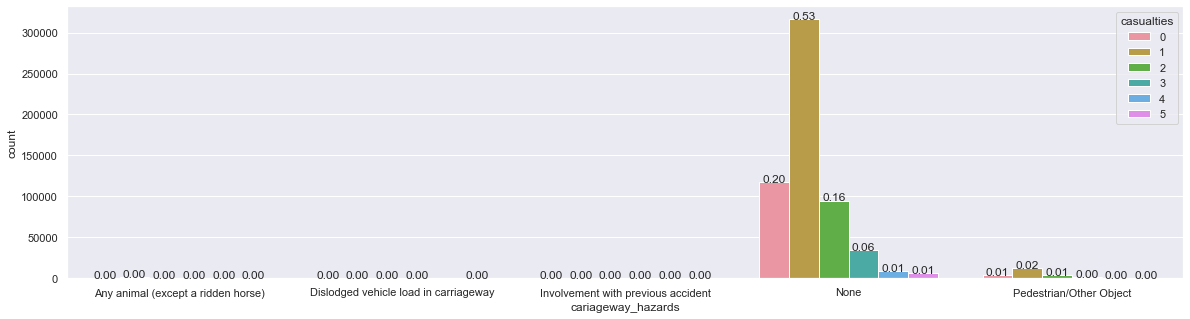

In [297]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='cariageway_hazards', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [298]:
pd.crosstab(index= acc_categorical['cariageway_hazards'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
cariageway_hazards,,,,,,,
Any animal (except a ridden horse),306,967,283,104,26,21,1707
Dislodged vehicle load in carriageway,11,26,7,2,0,2,48
Involvement with previous accident,26,52,16,3,4,1,102
None,116996,316063,94767,33996,8905,5813,576540
Pedestrian/Other Object,3911,12009,3736,1291,383,249,21579
All,121250,329117,98809,35396,9318,6086,599976


In [299]:
cariage_cas=pd.crosstab(index=acc_categorical['cariageway_hazards'], columns=acc_categorical['casualties'])
cariage_cas

casualties,0,1,2,3,4,5
cariageway_hazards,,,,,,
Any animal (except a ridden horse),306,967,283,104,26,21
Dislodged vehicle load in carriageway,11,26,7,2,0,2
Involvement with previous accident,26,52,16,3,4,1
None,116996,316063,94767,33996,8905,5813
Pedestrian/Other Object,3911,12009,3736,1291,383,249


In [300]:
(chi2, p, dof,_)= stats.chi2_contingency([cariage_cas.iloc[0].values,cariage_cas.iloc[1].values,cariage_cas.iloc[2].values,
                                         cariage_cas.iloc[3].values,cariage_cas.iloc[4].values])

In [301]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 91.66118652983393
p-value : 3.792378206982545e-11
Degree of freedom : 20


In [302]:
np.sqrt((chi2/599976)/(5-1))

0.006180104271098469

## urban_rural vs casualties

In [303]:
acc_categorical['urban_rural'].value_counts()

Rural    380670
Urban    219306
Name: urban_rural, dtype: int64

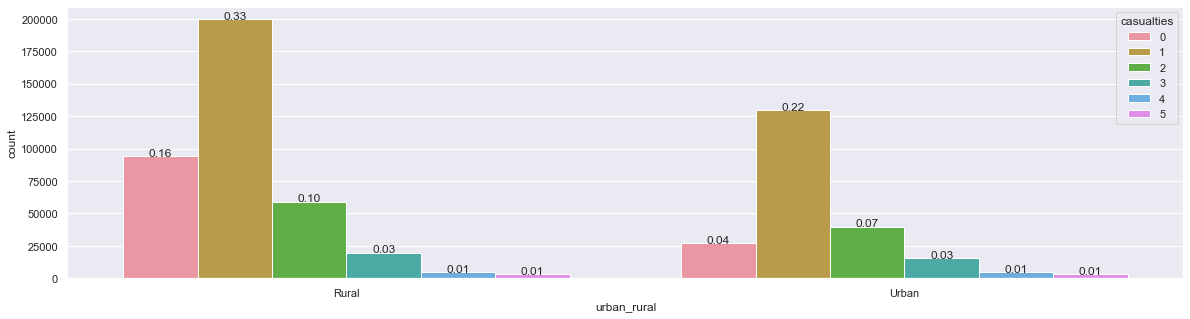

In [304]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='urban_rural', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")


In [305]:
pd.crosstab(index= acc_categorical['urban_rural'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
urban_rural,,,,,,,
Rural,94414,199613,59089,19822,4721,3011,380670
Urban,26836,129504,39720,15574,4597,3075,219306
All,121250,329117,98809,35396,9318,6086,599976


In [306]:
ur_cas=pd.crosstab(index=acc_categorical['urban_rural'], columns=acc_categorical['casualties'])
ur_cas

casualties,0,1,2,3,4,5
urban_rural,,,,,,
Rural,94414,199613,59089,19822,4721,3011
Urban,26836,129504,39720,15574,4597,3075


In [307]:
(chi2, p, dof,_)= stats.chi2_contingency([ur_cas.iloc[0].values,ur_cas.iloc[1].values])

In [308]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 14562.266698016852
p-value : 0.0
Degree of freedom : 5


In [309]:
np.sqrt((chi2/599976)/(2-1))

0.1557928604054399

## Police attended Vs Casualties

In [310]:
acc_categorical['did_police_attended'].value_counts()

Yes    492159
No     107817
Name: did_police_attended, dtype: int64

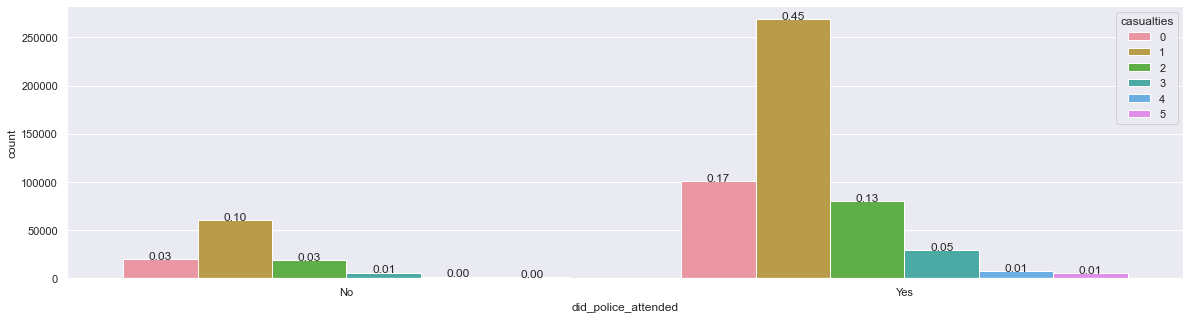

In [311]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='did_police_attended', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [312]:
pd.crosstab(index= acc_categorical['did_police_attended'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
did_police_attended,,,,,,,
No,20143,60464,18737,5958,1557,958,107817
Yes,101107,268653,80072,29438,7761,5128,492159
All,121250,329117,98809,35396,9318,6086,599976


In [313]:
pl_cas=pd.crosstab(index=acc_categorical['did_police_attended'], columns=acc_categorical['casualties'])
pl_cas

casualties,0,1,2,3,4,5
did_police_attended,,,,,,
No,20143,60464,18737,5958,1557,958
Yes,101107,268653,80072,29438,7761,5128


In [314]:
(chi2, p, dof,_)= stats.chi2_contingency([pl_cas.iloc[0].values,pl_cas.iloc[1].values])

In [315]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 315.2239327025876
p-value : 5.331714866716891e-66
Degree of freedom : 5


In [316]:
np.sqrt((chi2/599976)/(2-1))

0.02292147981567632

## Season and Casualties

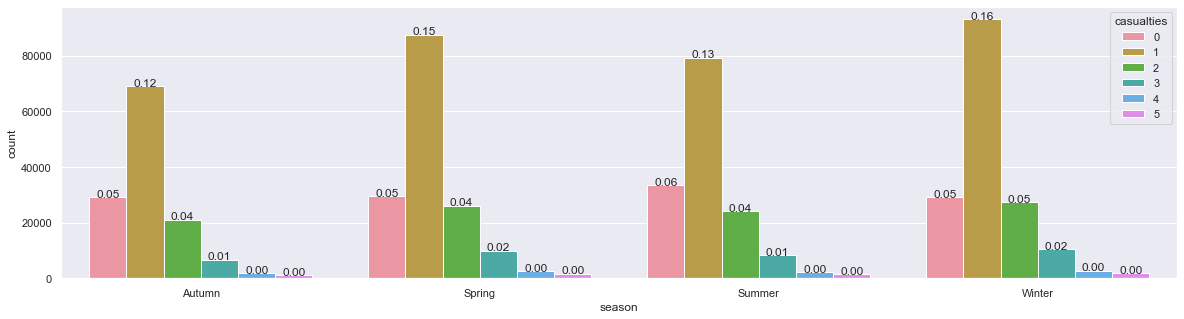

In [317]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='season', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [318]:
pd.crosstab(index= acc_categorical['season'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
season,,,,,,,
Autumn,29134,69182,21099,6710,1736,1231,129092
Spring,29564,87580,26117,9918,2576,1629,157384
Summer,33432,79294,24128,8277,2256,1438,148825
Winter,29120,93061,27465,10491,2750,1788,164675
All,121250,329117,98809,35396,9318,6086,599976


In [319]:
season_cas=pd.crosstab(index=acc_categorical['season'], columns=acc_categorical['casualties'])
season_cas

casualties,0,1,2,3,4,5
season,,,,,,
Autumn,29134,69182,21099,6710,1736,1231
Spring,29564,87580,26117,9918,2576,1629
Summer,33432,79294,24128,8277,2256,1438
Winter,29120,93061,27465,10491,2750,1788


In [320]:
(chi2, p, dof,_)= stats.chi2_contingency([season_cas.iloc[0].values,season_cas.iloc[1].values,
                                         season_cas.iloc[2].values,season_cas.iloc[3].values])

In [321]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 1943.9382945040948
p-value : 0.0
Degree of freedom : 15


In [322]:
np.sqrt((chi2/599976)/(4-1))

0.03286348915629201

## Day Class and Casualties

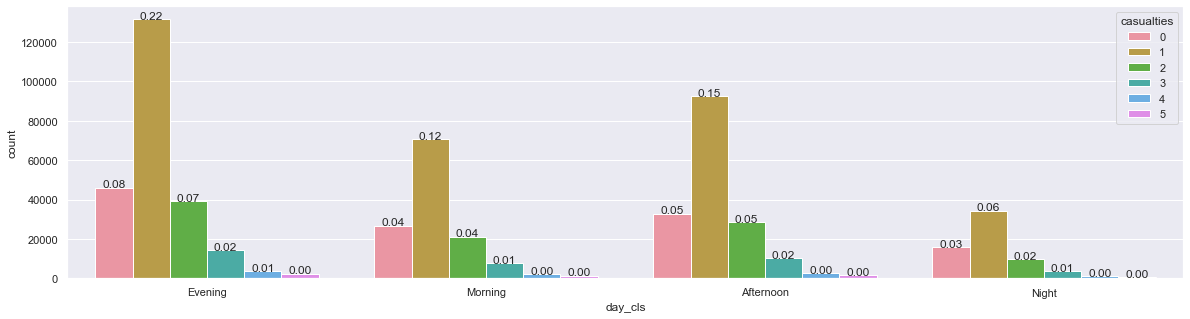

In [323]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig,ax= plt.subplots(figsize=(20,5))
ax= sns.countplot(x='day_cls', hue='casualties', data= acc_categorical)

for p in ax.patches:
    height= p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/acc_categorical.shape[0]),
           ha="center")

In [324]:
pd.crosstab(index= acc_categorical['day_cls'], columns= acc_categorical['casualties'],margins=True)

casualties,0,1,2,3,4,5,All
day_cls,,,,,,,
Afternoon,32771,92481,28536,10131,2593,1714,168226
Evening,45981,131500,39287,14104,3678,2338,236888
Morning,26718,70787,21126,7560,2045,1340,129576
Night,15780,34349,9860,3601,1002,694,65286
All,121250,329117,98809,35396,9318,6086,599976


In [325]:
daycls_cas=pd.crosstab(index=acc_categorical['day_cls'], columns=acc_categorical['casualties'])
daycls_cas

casualties,0,1,2,3,4,5
day_cls,,,,,,
Afternoon,32771,92481,28536,10131,2593,1714
Evening,45981,131500,39287,14104,3678,2338
Morning,26718,70787,21126,7560,2045,1340
Night,15780,34349,9860,3601,1002,694


In [326]:
(chi2, p, dof,_)= stats.chi2_contingency([daycls_cas.iloc[0].values,daycls_cas.iloc[1].values,
                                         daycls_cas.iloc[2].values,daycls_cas.iloc[3].values])

In [327]:
print("chi2    :", chi2)
print("p-value :", p)
print("Degree of freedom :",dof)

chi2    : 847.1345132278666
p-value : 7.188537296783741e-171
Degree of freedom : 15


In [328]:
np.sqrt((chi2/599976)/(4-1))

0.021694448854281508

In [329]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.utils import gen_even_slices

In [330]:
accident_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599976 entries, 0 to 599975
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   accident_id                599976 non-null  object        
 1   police_force               599976 non-null  int64         
 2   numberofvehicles           599976 non-null  int64         
 3   casualties                 599976 non-null  int64         
 4   Date                       599976 non-null  datetime64[ns]
 5   dayofweek                  599976 non-null  category      
 6   Time                       599965 non-null  datetime64[ns]
 7   local_auth_dist            599976 non-null  object        
 8   local_auth_highway         599976 non-null  object        
 9   first_rd_cls               599976 non-null  category      
 10  first_rd_number            599976 non-null  object        
 11  rd_type                    599976 non-null  category

In [331]:
accident_sorted.drop('area_postcode', axis=1, inplace=True)

(array([121250.,      0.,      0.,      0.,      0.,      0., 329117.,
             0.,      0.,      0.,      0.,      0.,  98809.,      0.,
             0.,      0.,      0.,      0.,  35396.,      0.,      0.,
             0.,      0.,      0.,   9318.,      0.,      0.,      0.,
             0.,   6086.]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        , 1.16666667, 1.33333333, 1.5       ,
        1.66666667, 1.83333333, 2.        , 2.16666667, 2.33333333,
        2.5       , 2.66666667, 2.83333333, 3.        , 3.16666667,
        3.33333333, 3.5       , 3.66666667, 3.83333333, 4.        ,
        4.16666667, 4.33333333, 4.5       , 4.66666667, 4.83333333,
        5.        ]),
 <BarContainer object of 30 artists>)

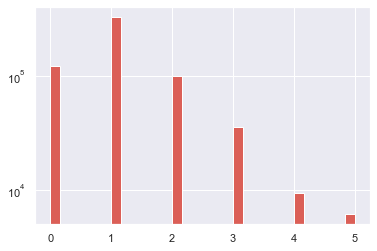

In [332]:
plt.hist(accident_sorted['casualties'],bins=30, log=True)

# Pipeline

In [333]:
log_transformer= make_pipeline(
    preprocessing.FunctionTransformer(np.log, validate=False),
    preprocessing.StandardScaler()
)

In [334]:
linear_model_preprocessor= ColumnTransformer(
[
    ('binned_numeric',preprocessing.KBinsDiscretizer(n_bins=10), ['police_force','numberofvehicles']),
    ('onehot_categorical',preprocessing.OneHotEncoder(), ['casualties','dayofweek','first_rd_cls','rd_type','speed_limit','second_rd_cls','pedcross_physicalfacility','light_conditions','weather_conditions','rd_surface_cond','spl_cond_at_site','urban_rural','did_police_attended','season','day_cls'])
],
    remainder='drop'
)

In [335]:
# Split dataset int train and test
acc_train, acc_test= train_test_split(accident_sorted, test_size=0.30, random_state=0)

## Dummy regressor

In [336]:
dummy= Pipeline([
    ('preprocessor',linear_model_preprocessor),
    ('regressor', DummyRegressor(strategy='mean'))
])

dummy.fit(acc_train, acc_train['casualties']),

C:\Users\sachi\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('binned_numeric',
                                                   KBinsDiscretizer(n_bins=10),
                                                   ['police_force',
                                                    'numberofvehicles']),
                                                  ('onehot_categorical',
                                                   OneHotEncoder(),
                                                   ['casualties', 'dayofweek',
                                                    'first_rd_cls', 'rd_type',
                                                    'speed_limit',
                                                    'second_rd_cls',
                                                    'pedcross_physicalfacility',
                                                    'light_conditions',
                                                    'weather_conditions',
             

In [337]:
# Scoring
def score_estimator(estimator,acc_test):
    y_pred= estimator.predict(acc_test)
    mse= metrics.mean_squared_error(acc_test['casualties'],y_pred)
    mae= metrics.mean_absolute_error(acc_test['casualties'],y_pred)
    
    print("MSE:", mse)
    print("MAE :" , mae)
    mask= y_pred>0
    mpd= metrics.mean_poisson_deviance(acc_test['casualties'][mask], y_pred)
    print("mean poisson deviance : ", mpd)

In [338]:
print("Constant Frequency Evaluation:")
score_estimator(dummy,acc_test)

Constant Frequency Evaluation:
MSE: 0.8741947775474083
MAE : 0.6563351236195479
mean poisson deviance :  0.8184055645038399


## Poisson Regressor

In [339]:
poisson_glm= Pipeline([
    ('preprocessor', linear_model_preprocessor),
    ('regressor',linear_model.PoissonRegressor(alpha=0, max_iter=500))
])

poisson_glm.fit(acc_train, acc_train['casualties'])

print("Poisson Results:")
score_estimator(poisson_glm,acc_test)

C:\Users\sachi\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


Poisson Results:
MSE: 1.1219325036841257e-05
MAE : 0.0006484751721918715
mean poisson deviance :  8.01309476931164e-06


## Tweedie Regressor

In [340]:
tweedie_glm= Pipeline([
    ('preprocessor', linear_model_preprocessor),
    ('regressor',linear_model.TweedieRegressor(power=1, link='log'))
])

tweedie_glm.fit(acc_train, acc_train['casualties'])

print("Tweedie Results:")
score_estimator(tweedie_glm,acc_test)

C:\Users\sachi\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


Tweedie Results:
MSE: 0.669945050899471
MAE : 0.5528462653632555
mean poisson deviance :  0.6440400758370158
